# **HEART DISEASE PREDICTION**

## **INTRODUCTION**

The human heart pumps blood throughout the body, sustaining life. When its structure or function is compromised, cardiovascular diseases (CVDs) arise including coronary artery disease, heart failure, and arrhythmias.

According to the World Health Organization (2023), CVDs are the leading cause of death globally, responsible for 17.9 million deaths annually. Early detection is key, yet traditional diagnosis can be slow or subjective.

Machine learning offers a data-driven approach to identify subtle patterns in medical data, improving risk prediction and decision support.
This project applies ML techniques to predict the likelihood of heart disease using patient health indicators.

## **Project Overview**

This project explores how machine learning can predict heart disease presence based on clinical data such as age, cholesterol, chest pain type, blood pressure, and heart rate.
The goal is to build a reliable model that not only predicts but also highlights which health factors contribute most to heart disease risk, aiding prevention and medical insight.

## **Problem Statement**

Heart disease prediction remains difficult due to complex physiological relationships and data variability.
This project seeks to answer the question: Can patient health data be used to accurately predict heart disease using machine learning?

By addressing this, the project aims to enhance diagnostic efficiency and uncover the most influential predictors.

## **Project Objectives**

1. **Analyze** the heart disease dataset to uncover relationships among key medical variables.  
2. **Preprocess and clean** the data to ensure high-quality input for model training.  
3. **Develop and evaluate** multiple machine learning models for binary classification (disease vs. no disease).  
4. **Identify** the most influential features contributing to heart disease prediction.  
5. **Present** insights that can guide data-driven healthcare decision-making and early screening.
6. **Deploy on Streamlit**


## **Dataset Description**

This project uses the **Cleveland Heart Disease Dataset** from the **UCI Machine Learning Repository**.  
The database originally contains **76 attributes**, but all published experiments use a subset of **14 key features**, which are listed below. The "goal" field represents the **presence of heart disease** in the patient — integer-valued from 0 (no disease) to 4 (severe disease). However, ML experiments typically treat this as a **binary classification problem** (0 = no disease, 1 = disease).  

Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).


Diagnosis of heart disease (angiographic disease status)  
Value 0: < 50% diameter narrowing  
Value 1: > 50% diameter narrowing

Notes from the discussion forum of the dataset:

data #93, 159, 164, 165 and 252 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs.
data #49 and 282 have thal = 0, also incorrect. They are also NaNs in the original dataset.  

Action: Drop the faulty data! (7 data entry will be dropped)



| **Column** | **Description**                                                                                           |
| ---------- | --------------------------------------------------------------------------------------------------------- |
| `age`      | Age in years                                                                                              |
| `sex`      | Sex (1 = male, 0 = female)                                                                                |
| `cp`       | Chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)         |
| `trestbps` | Resting blood pressure on admission to the hospital (mm Hg)                                            |
| `chol`     | Serum cholesterol (mg/dl)                                                                                 |
| `fbs`      | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)                                                     |
| `restecg`  | Resting electrocardiographic results (**0** = normal, **1** = ST-T wave abnormality(T wave inversions and/or ST elevation or depression of > 0.05 mV), **2** = left ventricular hypertrophy( showing probable or definite left ventricular hypertrophy by Estes' criteria)) |
| `thalach`  | Maximum heart rate achieved                                                                               |
| `exang`    | Exercise-induced angina (1 = yes, 0 = no)                                                                 |
| `oldpeak`  | ST depression induced by exercise relative to rest                                                        |
| `slope`    | Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)                          |
| `ca`       | Number of major vessels (0–3) colored by fluoroscopy                                                      |
| `thal`     | Thalassemia type (1 = fixed defect, 2 = normal, 3 = reversible defect; 0 = invalid)                       |
| `target`   | Diagnosis of heart disease (0 = no disease, 1 = disease)                                                  |


**Note:**  
Some entries contain incorrect values (e.g., `ca=4` and `thal=0`) which will be treated as missing and removed during data cleaning.


**Reference:**  
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., Guppy, K. H., Lee, S., & Froelicher, V. (1989). *International application of a new probability algorithm for the diagnosis of coronary artery disease.* American Journal of Cardiology, 64(5), 304–310.  
- **UCI Machine Learning Repository:** [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease)  
- **World Health Organization (WHO, 2024):** *Cardiovascular diseases (CVDs) Fact Sheet*

---
**Dataset Source**
- Source: https://www.kaggle.com/datasets/data855/heart-disease
- Original source: https://archive.ics.uci.edu/dataset/45/heart+disease


## **Installations and Imports**

In [3]:
# Import Standard Libraries

import numpy as np
import pandas as pd
import warnings
import joblib


# Imports for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  #  set default plot style
from textwrap import fill

# Ignore warnings
warnings.filterwarnings("ignore")

# Imports for Preprocessing & Pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imports for Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Imports for Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Imports for Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)



## **Loading the Dataset**

In [4]:
# load dataset from directory and convert to dataframe

file = "heart.csv"
df = pd.read_csv(file)           # loading and converting the dataset into a dataframe and assigning the dataset to the variable 'df'

## **Dataset Exploration**

In [5]:
# View the nature of the distribution of the whole dataset from the first 10 entries

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### **Create a Function that explores the dataset**

In [6]:
#  Funcion for Initial Data Inspection (Auto EDA Explorer Function)

def auto_explore(df, corr_threshold=0.3):
    print("🔹 Dataset Shape:", df.shape)      # Number of rows and columns
    print("\n🔹 Column Names:\n", list(df.columns))   # Feature names
    print("\n🔹 Dataset Info:\n")     
    df.info()                                           # data types and non-null counts
    print("\n🔹 Missing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])     # check for missing values
    print("\n🔹 Duplicates:", df.duplicated().sum())   # check for duplicate records
    print("\n🔹 Descriptive Statistics:")
    display(df.describe().T)                       # Descriptive statistics for numerical records

    print()

    # Correlation Heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

    # Highly correlated features
    corr_matrix = df.corr(numeric_only=True).abs()
    high_corr = [(i, j, corr_matrix.loc[i,j])
                 for i in corr_matrix.columns for j in corr_matrix.columns
                 if i != j and corr_matrix.loc[i,j] > corr_threshold]
    if high_corr:
        print("\n🔹 Highly Correlated Pairs (> {:.0%}):".format(corr_threshold))
        for i, j, v in high_corr:
            print(f"{i} ↔ {j}: {v:.2f}")
    else:
        print("\nNo strong correlations above threshold.")



🔹 Dataset Shape: (303, 14)

🔹 Column Names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

🔹 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

🔹 Missing Values:
 Series([], dt

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


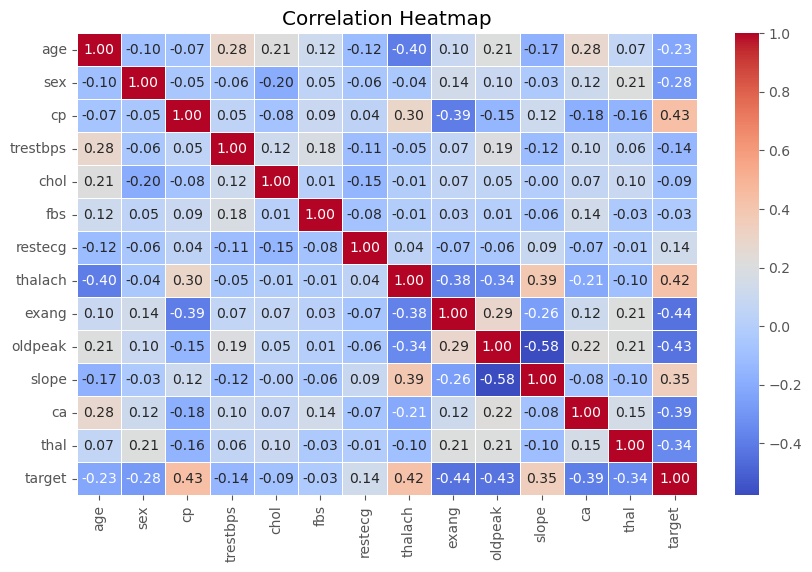


🔹 Highly Correlated Pairs (> 30%):
age ↔ thalach: 0.40
cp ↔ exang: 0.39
cp ↔ target: 0.43
thalach ↔ age: 0.40
thalach ↔ exang: 0.38
thalach ↔ oldpeak: 0.34
thalach ↔ slope: 0.39
thalach ↔ target: 0.42
exang ↔ cp: 0.39
exang ↔ thalach: 0.38
exang ↔ target: 0.44
oldpeak ↔ thalach: 0.34
oldpeak ↔ slope: 0.58
oldpeak ↔ target: 0.43
slope ↔ thalach: 0.39
slope ↔ oldpeak: 0.58
slope ↔ target: 0.35
ca ↔ target: 0.39
thal ↔ target: 0.34
target ↔ cp: 0.43
target ↔ thalach: 0.42
target ↔ exang: 0.44
target ↔ oldpeak: 0.43
target ↔ slope: 0.35
target ↔ ca: 0.39
target ↔ thal: 0.34


In [7]:
# Execute the Auto EDA Explorer Function on the Dataset

auto_explore(df)

### **Feature's Unique Values**

In [8]:
# view unique observations in each column

#create a for loop to loop over every cplumn in the dataframe
for col in df.columns:
    print(f"\nUnique Values in: {col}")
    print(df[col].unique())


Unique Values in: age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]

Unique Values in: sex
[1 0]

Unique Values in: cp
[3 2 1 0]

Unique Values in: trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]

Unique Values in: chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 28

### **Features Unique Values and Count**

In [9]:
# view unique observations and count in each column.

# create a for loop to loop over every column in the dataframe
for col in df.columns:
    print(f"\nUnique Values and Count in: {col}")
    print(df[col].value_counts())


Unique Values and Count in: age
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

Unique Values and Count in: sex
sex
1    207
0     96
Name: count, dtype: int64

Unique Values and Count in: cp
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

Unique Values and Count in: trestbps
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
108     6
124     6
135     6
145     5
152     5
134     5
170     4
100     4
122     4
105     3
180     3
136     3
142     3
126     3
115     3
148     2
146     2
144     2
178     2
94      2
102     2
104     1
155

## **General Observations from Dataset Exploration**

---

## Structure and Data Types
- The dataset contains **303 rows** and **14 columns**.  
- All features are of **numeric types (int64/float64)**.  
- However, some features such as `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `thal`, and `target` are **categorical variables already label-encoded**.
  

---

## Missing and Duplicate Data
- **No missing values** were detected in the dataset.  
- **1 duplicate record** found.  
- This indicates a structurally clean dataset ready for analysis, though logical errors (invalid encoded values) still need to be addressed.

---

## Descriptive Statistics
- The numeric distributions are generally within reasonable medical ranges:
  - **Age** ranges between 29 and 77 years.  
  - **Resting blood pressure (trestbps)** averages around 131 mm Hg, typical for mixed healthy and heart-affected patients.  
  - **Cholesterol (chol)** values show some variability with a mean of ~246 mg/dl, which may indicate elevated cholesterol in several patients.  
  - **Maximum heart rate (thalach)** has a mean of ~150 bpm, decreasing slightly with age as expected.  
  - **Oldpeak (ST depression)** varies between 0.0 and 6.2, suggesting significant differences in exercise-induced heart stress among patients.

---

## Target Variable
- The **target variable** (`target`) is **binary-encoded**:
  - `0` → No heart disease  
  - `1` → Presence of heart disease  
- The class distribution appears moderately balanced, allowing fair model training without major resampling.

---

## Correlation Insights
- A correlation heatmap revealed the following:
  - **`thalach` (maximum heart rate achieved)** shows a **strong positive correlation** with heart disease (`target`), meaning higher heart rates are associated with higher disease likelihood.  
  - **`oldpeak`**, **`exang`**, and **`cp` (chest pain type)** show **notable positive correlations** with heart disease presence.  
  - **`age`**, **`trestbps`**, and **`chol`** have weaker correlations with the target, indicating they may be secondary risk indicators.  
- No strong multicollinearity (> 0.8) was detected between independent variables, meaning most features provide unique information.

---

## Potential Data Issues
- According to dataset documentation, some entries are **known to have invalid coded values**:
  - `ca = 4` → Invalid, should be treated as missing.  
  - `thal = 0` → Invalid, should be treated as missing.  
- These cases will be identified and dropped during the cleaning phase.

---


---

**Summary:**  
The dataset is well-structured, numerically consistent, and moderately balanced for binary classification. However, careful **data cleaning and semantic labeling** are essential to ensure interpretable analysis and accurate model insights.


## **Dataset Cleaning and Preprocessing**

### **Dropping Invalid Entries**

In [10]:
# Remove invalid 'ca' entries
df = df[df['ca'] < 4]

# Remove invalid 'thal' entries
df = df[df['thal'] > 0]

print(f" Cleaned dataset now contains {len(df)} rows")


 Cleaned dataset now contains 296 rows


### **Checking for duplicates**

In [11]:
# check for dupplicates

duplicates = df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


### **Checking for null values again**

In [12]:
# check for null entries

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### **Renaming Columns for Clarity**

In [13]:
# rename columns for clarity

df.rename(columns={
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'heart_disease'
}, inplace=True)


In [14]:
# confirm columns have been properly renamed

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'heart_disease'],
      dtype='object')

### **Making a copy of my clean dataset**  


In [15]:
# Make a copy of the cleaned dataset
clean_df = df.copy()

# Save to a CSV file for reuse
clean_df.to_csv('heart_clean.csv', index=False)

print("Clean dataset copy created and saved as 'heart_clean.csv'")


Clean dataset copy created and saved as 'heart_clean.csv'


### **Making a copy of my clean dataset for Interpretable Analysis**  
Here I will be renaming my Categorical Columns Entries with interpretable labels for analysis

In [16]:
# Create a copy of cleaned dataframe for EDA
eda_df = df.copy()


### **Semantic Labeling (Replacing Encoded Values with Descriptive Labels)**

In [17]:
# Apply categorical replacements

# Semantic Labeling for Sex
eda_df['sex'] = eda_df['sex'].map({0: 'Female', 1: 'Male'})

# Semantic Labeling for Chest Pain Type
eda_df['chest_pain_type'] = eda_df['chest_pain_type'].map({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
})

# Semantic Labeling for Fasting Blood Sugar
eda_df['fasting_blood_sugar'] = eda_df['fasting_blood_sugar'].map({
    0: 'False (<=120 mg/dl)',
    1: 'True (>120 mg/dl)'
})

# Semantic Labeling for Resting Ecg
eda_df['resting_ecg'] = eda_df['resting_ecg'].map({
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
})

# Semantic Labeling for Exercise Induced Angina
eda_df['exercise_induced_angina'] = eda_df['exercise_induced_angina'].map({
    0: 'No',
    1: 'Yes'
})

# Semantic Labeling for ST Slope
eda_df['st_slope'] = eda_df['st_slope'].map({
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
})

# Semantic Labeling for Thalassemia
eda_df['thalassemia'] = eda_df['thalassemia'].map({
    1: 'Fixed Defect',
    2: 'Normal',
    3: 'Reversible Defect'
})



In [18]:
# Confirm Semantic Labeling

# creating a for loop to loop over every column in the eda dataframe
for col in eda_df.columns:
    print(f"\nUnique Values and Count in: {col}")
    print(eda_df[col].value_counts())


Unique Values and Count in: age
age
58    18
57    17
54    16
59    14
51    12
62    11
52    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
45     8
61     8
42     8
55     8
43     7
48     7
53     7
46     7
66     7
50     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
38     1
Name: count, dtype: int64

Unique Values and Count in: sex
sex
Male      201
Female     95
Name: count, dtype: int64

Unique Values and Count in: chest_pain_type
chest_pain_type
Typical Angina      141
Non-Anginal Pain     83
Atypical Angina      49
Asymptomatic         23
Name: count, dtype: int64

Unique Values and Count in: resting_bp
resting_bp
120    37
130    36
140    32
110    19
150    17
160    11
138    10
125    10
128    10
112     9
118     7
132     7
124     6
135     6
108     6
134     5
145     5
152     5
170     4
100     4
122     4
105     3
180     3
136     3
142

In [19]:
# Dataframe Check

eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      296 non-null    int64  
 1   sex                      296 non-null    object 
 2   chest_pain_type          296 non-null    object 
 3   resting_bp               296 non-null    int64  
 4   cholesterol              296 non-null    int64  
 5   fasting_blood_sugar      296 non-null    object 
 6   resting_ecg              296 non-null    object 
 7   max_heart_rate           296 non-null    int64  
 8   exercise_induced_angina  296 non-null    object 
 9   st_depression            296 non-null    float64
 10  st_slope                 296 non-null    object 
 11  num_major_vessels        296 non-null    int64  
 12  thalassemia              296 non-null    object 
 13  heart_disease            296 non-null    int64  
dtypes: float64(1), int64(6), object

### **Data Types and Count**

In [20]:
# Check Data Types and Their Count

# Count of different datatypes
dtypes_count = eda_df.dtypes.value_counts()
print("Count of Different Datatypes:\n", dtypes_count)

# Columns with object (categorical) datatype
object_dtypes = eda_df.select_dtypes(include='object').columns
print("\nColumns with Object (Categorical) Datatype:\n", list(object_dtypes))

# Columns with int64 (integer) datatype
int64_dtypes = eda_df.select_dtypes(include='int64').columns
print("\nColumns with int64 (Integer) Datatype:\n", list(int64_dtypes))

# Columns with float64 (floating point) datatype
float64_dtypes = eda_df.select_dtypes(include='float64').columns
print("\nColumns with float64 (Floating Point) Datatype:\n", list(float64_dtypes))


Count of Different Datatypes:
 object     7
int64      6
float64    1
Name: count, dtype: int64

Columns with Object (Categorical) Datatype:
 ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia']

Columns with int64 (Integer) Datatype:
 ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'num_major_vessels', 'heart_disease']

Columns with float64 (Floating Point) Datatype:
 ['st_depression']


### **Group Numerical and Categorical Features**

In [21]:
# Group Numerical and Categorical Features

# Select categorical columns
cat_columns = eda_df.select_dtypes(include=['object', 'category'])

# Select numerical columns (both int and float)
num_columns = eda_df.select_dtypes(include=['int64', 'float64'])

# print("Categorical Columns:\n", cat_columns)
# print("\nNumerical Columns:\n", num_columns)

print(f"\nEDA dataset contains {len(cat_columns)} categorical columns and {len(num_columns)} numerical columns.")



EDA dataset contains 296 categorical columns and 296 numerical columns.


### **Summary of Data Cleaning**  


1. **Removed Unwanted Records** by removing rows with `ca = 4` and `thal = 0`.  
2. **Renamed column headers** for interpretability and consistency.  
3. **Semantic Labeling (Group and map categorical codes)** (e.g., chest pain types, ECG results) into meaningful labels for clear EDA visualization.
4. **Grouped Columns based on data type**  
5. **Save a cleaned version** of the dataset for model training while keeping a descriptive version for exploratory analysis.


## **EXPLORATORY DATA ANALYSIS**

### **Exploring Target Column**

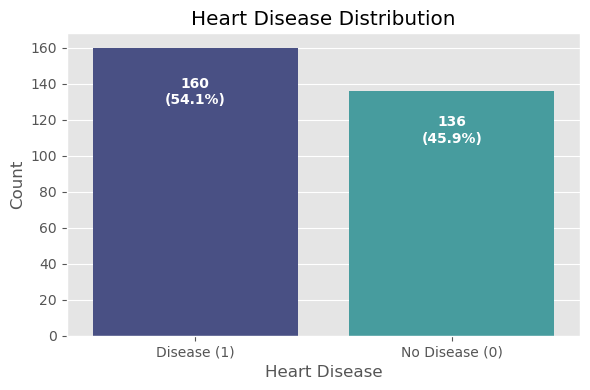

In [22]:
# Visualize the Target Distribution

# Reorder so positive class (1) appears first
target_order = [1, 0]

# Calculate counts and percentages in that order
target_counts = eda_df['heart_disease'].value_counts().reindex(target_order)
target_percent = eda_df['heart_disease'].value_counts(normalize=True).reindex(target_order) * 100

# Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x=target_counts.index,
    y=target_counts.values,
    palette='mako',
    order=target_order
)

plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")

# Custom tick labels for clarity
plt.xticks([0, 1], ["Disease (1)", "No Disease (0)"])

# Add count and percentage labels *inside* bars near the top
for i, (count, percent) in enumerate(zip(target_counts.values, target_percent.values)):
    plt.text(i, count * 0.9,   # place text slightly below top of each bar
             f'{count}\n({percent:.1f}%)',
             ha='center', va='top', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### **Insiight**  

- The dataset is moderately balanced, with **54.5%** of patients having heart disease (target=1) and **45.5%** not having heart disease (target=0). This near-equal distribution means model training can proceed without requiring aggressive over-sampling or under-sampling techniques.

## **Correlation and Distribution of Numeric Features**

### **Correlation Heat Map for Numeric Features**

In [23]:
# create function to plot correlation heatmap for numeric features

def correlation_analysis(df, top_n=12, annot=True, cmap='coolwarm'):
    
    num_df = df.select_dtypes(include=['int64', 'float64'])
    corr = num_df.corr()
    
    plt.figure(figsize=(8,8))
    sns.heatmap(corr, annot=annot, fmt=".2f", cmap=cmap, linewidths=0.5)
    plt.title("Correlation Matrix (numeric features)")
    plt.tight_layout()
    plt.show()
    
    # Show top correlated pairs
    abs_corr = corr.abs()
    upper = abs_corr.where(np.triu(np.ones(abs_corr.shape), k=1).astype(bool))
    pairs = (upper.stack().sort_values(ascending=False))
    print("\nTop correlated feature pairs (absolute correlation):")
    display(pairs.head(12))



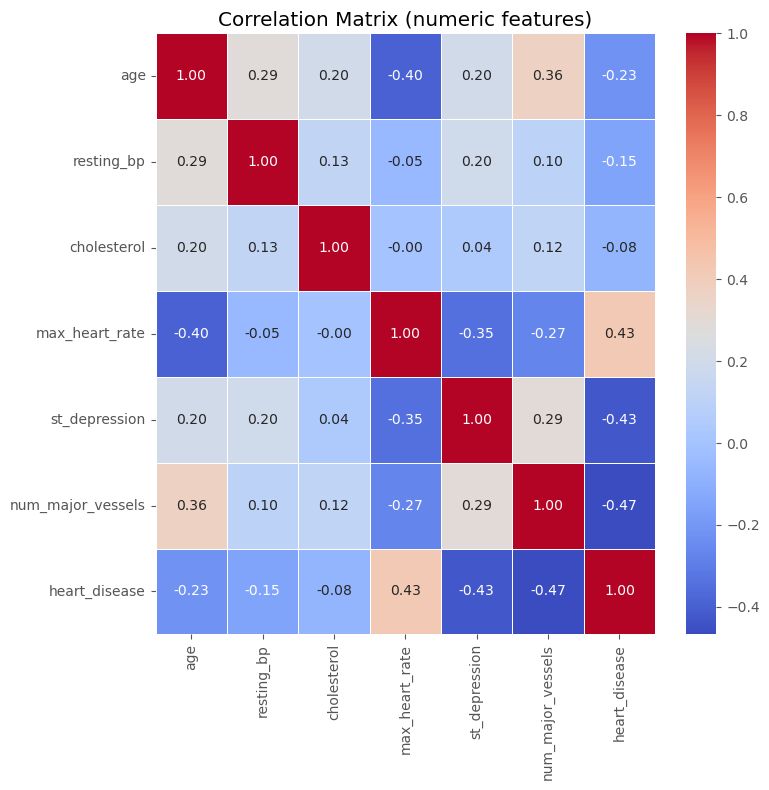


Top correlated feature pairs (absolute correlation):


num_major_vessels  heart_disease        0.467158
st_depression      heart_disease        0.428804
max_heart_rate     heart_disease        0.426655
age                max_heart_rate       0.395989
                   num_major_vessels    0.364229
max_heart_rate     st_depression        0.346742
st_depression      num_major_vessels    0.292905
age                resting_bp           0.288701
max_heart_rate     num_major_vessels    0.267861
age                heart_disease        0.225453
                   cholesterol          0.200920
                   st_depression        0.199373
dtype: float64

In [24]:
# execute correlation function

correlation_analysis(eda_df)

### **Statistical Summary for Numeric Features**

In [25]:
# View Statistical Summary of Numerical Variables

eda_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
resting_bp,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
max_heart_rate,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2
num_major_vessels,296.0,0.679054,0.939726,0.0,0.0,0.0,1.00,3.0
heart_disease,296.0,0.540541,0.499198,0.0,0.0,1.0,1.00,1.0


### **Distribution of Numeric Features**

In [26]:
# create a list of numeric and categorical features for easy analysis

cat_columns = eda_df.select_dtypes(include=['object']).columns.tolist()
num_columns = eda_df.select_dtypes(exclude=['object']).columns.tolist()


In [27]:
# create a function to explore and visualize numeric features

def explore_numerical(df, num_columns, target_col=None, ncols=2, palette='mako', show_outliers=True):
    
    # For plotting comparisons, remove target_col from num_columns if present
    features = [c for c in num_columns if c != target_col]
    if not features:
        print("No numeric independent features to plot (all numeric columns are the target).")
        return
    
    n = len(features)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]
    
    for i, col in enumerate(features):
        ax = axes[i]
        # Histogram + KDE
        sns.histplot(df[col].dropna(), kde=True, ax=ax, stat='count', color=sns.color_palette(palette, n_colors=1)[0])
        ax.set_title(f"{col.replace('_', ' ').title()} - Distribution")
        ax.set_xlabel('')
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
    
    # Outlier detection summary (IQR) and counts
    if show_outliers:
        print("\nOutlier Summary (IQR method):")
        outlier_summary = []
        for col in features:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower) | (df[col] > upper)][col]
            outlier_summary.append((col, outliers.count()))
        outlier_df = pd.DataFrame(outlier_summary, columns=['feature', 'outlier_count']).set_index('feature')
        display(outlier_df)


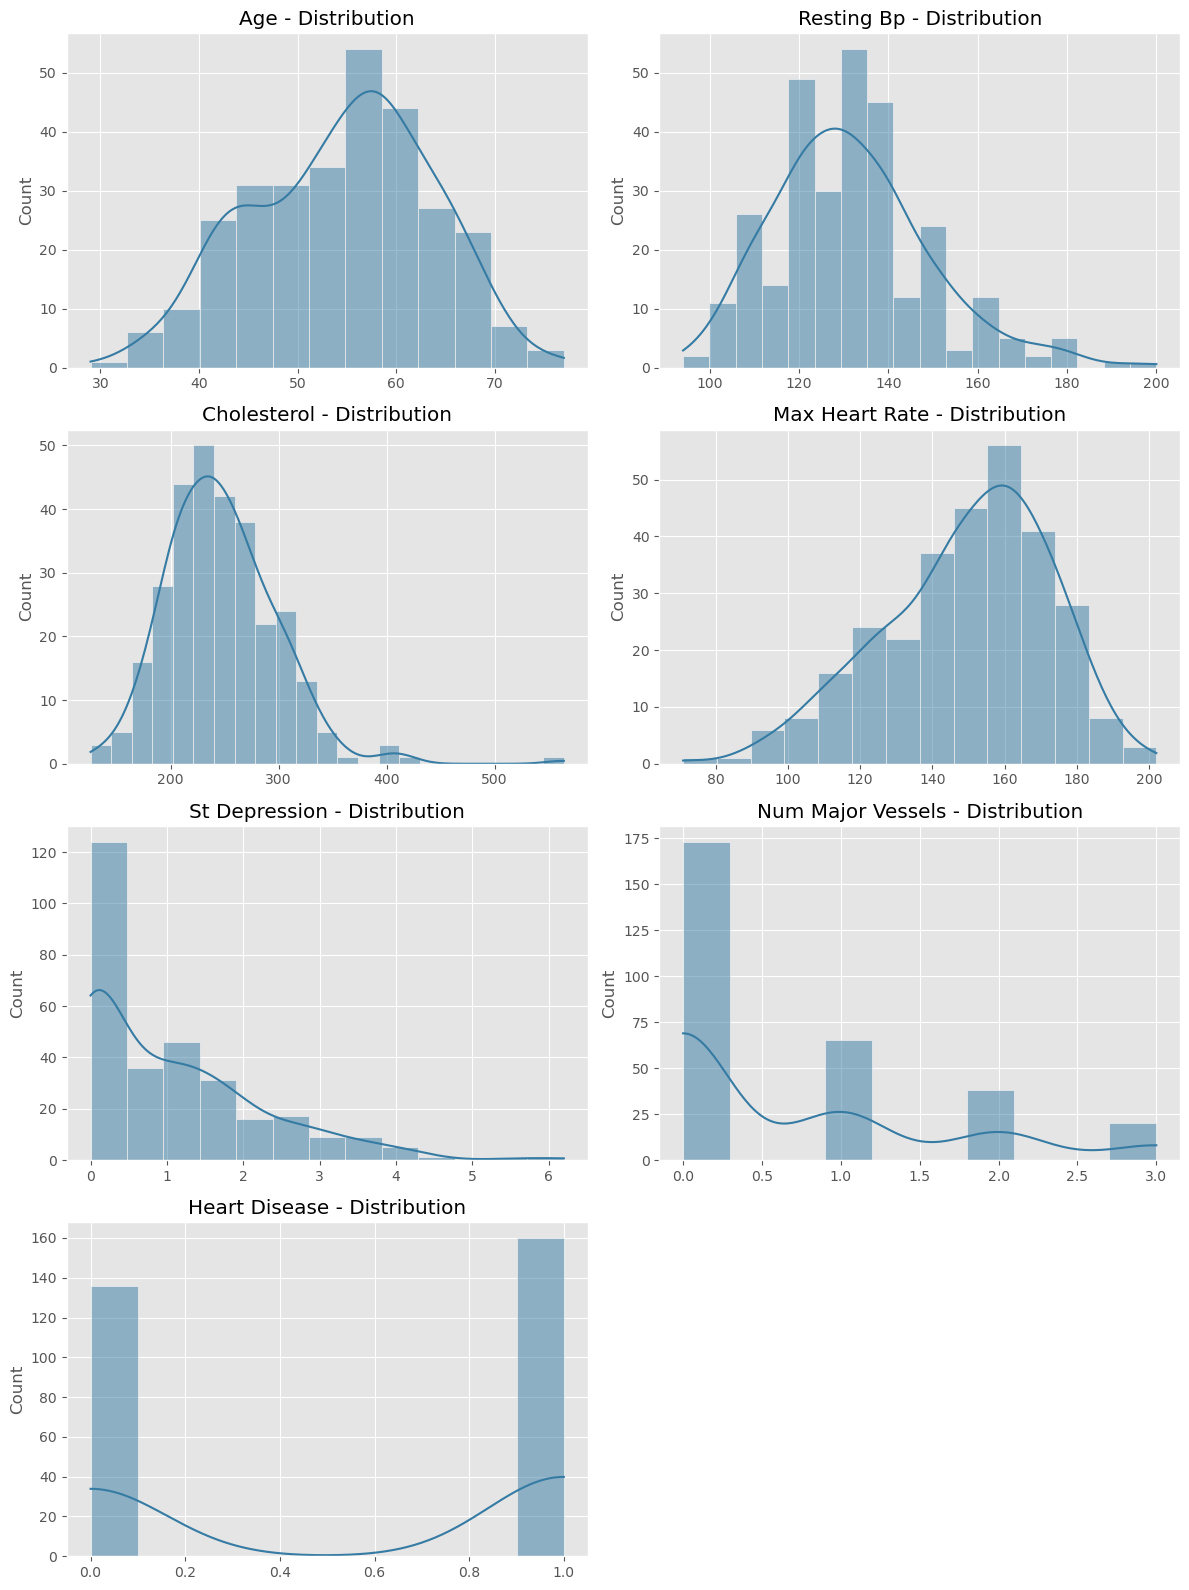


Outlier Summary (IQR method):


,outlier_count
feature,
age,0
resting_bp,9
cholesterol,5
max_heart_rate,1
st_depression,5
num_major_vessels,20
heart_disease,0


In [28]:
# execute numeric features exploration function

explore_numerical(eda_df, num_columns)

### **Skewness of Numeric Features**

In [29]:
#  Calculate and display skewness only for numerical features

print("\nSkewness of Numerical Features:\n")

# Select only numeric columns
num_cols = eda_df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column and calculate skewness
for col in num_cols:
    skew = eda_df[col].skew().round(2)
    
    # Interpret skewness direction
    if skew > 0:
        shape = 'Right-skewed'
    elif skew < 0:
        shape = 'Left-skewed'
    else:
        shape = 'Symmetrical'
    
    # Print result
    print(f"{col}: {skew} ({shape})")



Skewness of Numerical Features:

age: -0.21 (Left-skewed)
resting_bp: 0.71 (Right-skewed)
cholesterol: 1.13 (Right-skewed)
max_heart_rate: -0.53 (Left-skewed)
st_depression: 1.24 (Right-skewed)
num_major_vessels: 1.17 (Right-skewed)
heart_disease: -0.16 (Left-skewed)


## **Summary of Numeric Features Distribution and Statistics**

### **Distribution Patterns**

**Age:** Fairly symmetrical distribution (mean ≈ 54.5 years) with no extreme outliers. Most patients are within 48–61 years, reflecting a middle-aged population.

**Resting Blood Pressure:** Slightly right-skewed (0.71), centered around 130 mmHg. A few mild outliers above 180–200 mmHg suggest possible hypertensive cases.

**Cholesterol:** Right-skewed (1.13) with most values between 200–275 mg/dL, indicating elevated cholesterol levels for many patients. Outliers above 500 mg/dL were detected.

**Maximum Heart Rate:** Left-skewed (-0.53), typically ranging from 130–170 bpm. This aligns with expected physiological decline in heart rate with age.

**ST Depression:** Right-skewed (1.24) with most values near zero, indicating that a majority of patients show minimal depression in ST segments, while a few experience significantly higher levels (up to 6.2).

**Number of Major Vessels:** Right-skewed (1.17) and highly imbalanced — many patients have 0 major vessels affected, while fewer have 2–3.

**Heart Disease:** Binary target variable (0: no disease, 1: disease), with roughly 54% positive cases, suggesting a moderately balanced target.

**Outlier analysis** (via the IQR method) revealed that num_major_vessels (20 cases) and resting_bp (9 cases) had the highest count of outliers, which aligns with their visible right-tail distributions.

### **Correlation Insights**

The correlation heatmap and top correlation pairs show clear patterns:

- **num_major_vessels (-0.47)**, **st_depression (-0.43)**, and **max_heart_rate (0.43)** are the most strongly correlated with heart_disease.

- Higher number of major vessels and ST depression are negatively associated with heart disease.

- Higher maximum heart rate is positively associated — patients with heart disease tend to have higher max heart rates.

No multicollinearity concerns were observed among independent variables, as most pairwise correlations remain below 0.5.


## **Distribution of Categorical Features**

### **Bar Chart Distributions of Categorical features**

In [32]:
# define a function that explores and visualizes categorical features

def explore_categorical(df, cat_columns, target_col=None, ncols=2, palette='mako'):
    """
    Visualizes categorical feature distributions and displays percentage labels on top of each bar.
    """
    
    if not cat_columns:
        print("No categorical columns provided.")
        return
    
    n = len(cat_columns)
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4 * nrows))
    axes = axes.flatten() if n > 1 else [axes]
    
    for i, col in enumerate(cat_columns):
        ax = axes[i]
        order = df[col].value_counts().index
        
        # Plot countplot (with or without target hue)
        if target_col:
            sns.countplot(data=df, x=col, hue=target_col, order=order, ax=ax, palette=palette)
            ax.legend(title=target_col, loc='upper right', fontsize='small')
        else:
            sns.countplot(data=df, x=col, order=order, ax=ax, palette=palette)
        
        # Title and axis labels
        ax.set_title(col.replace('_', ' ').title())
        ax.tick_params(axis='x', rotation=45)
        ax.set_ylabel('Count')

        # Add percentage annotations on top of bars
        total = len(df)
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                percentage = f'{(height / total * 100):.1f}%'
                ax.text(
                    p.get_x() + p.get_width() / 2,
                    height + (total * 0.005),
                    percentage,
                    ha='center',
                    va='bottom',
                    fontsize=9,
                    color='black'
                )
    
    # Turn off any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()


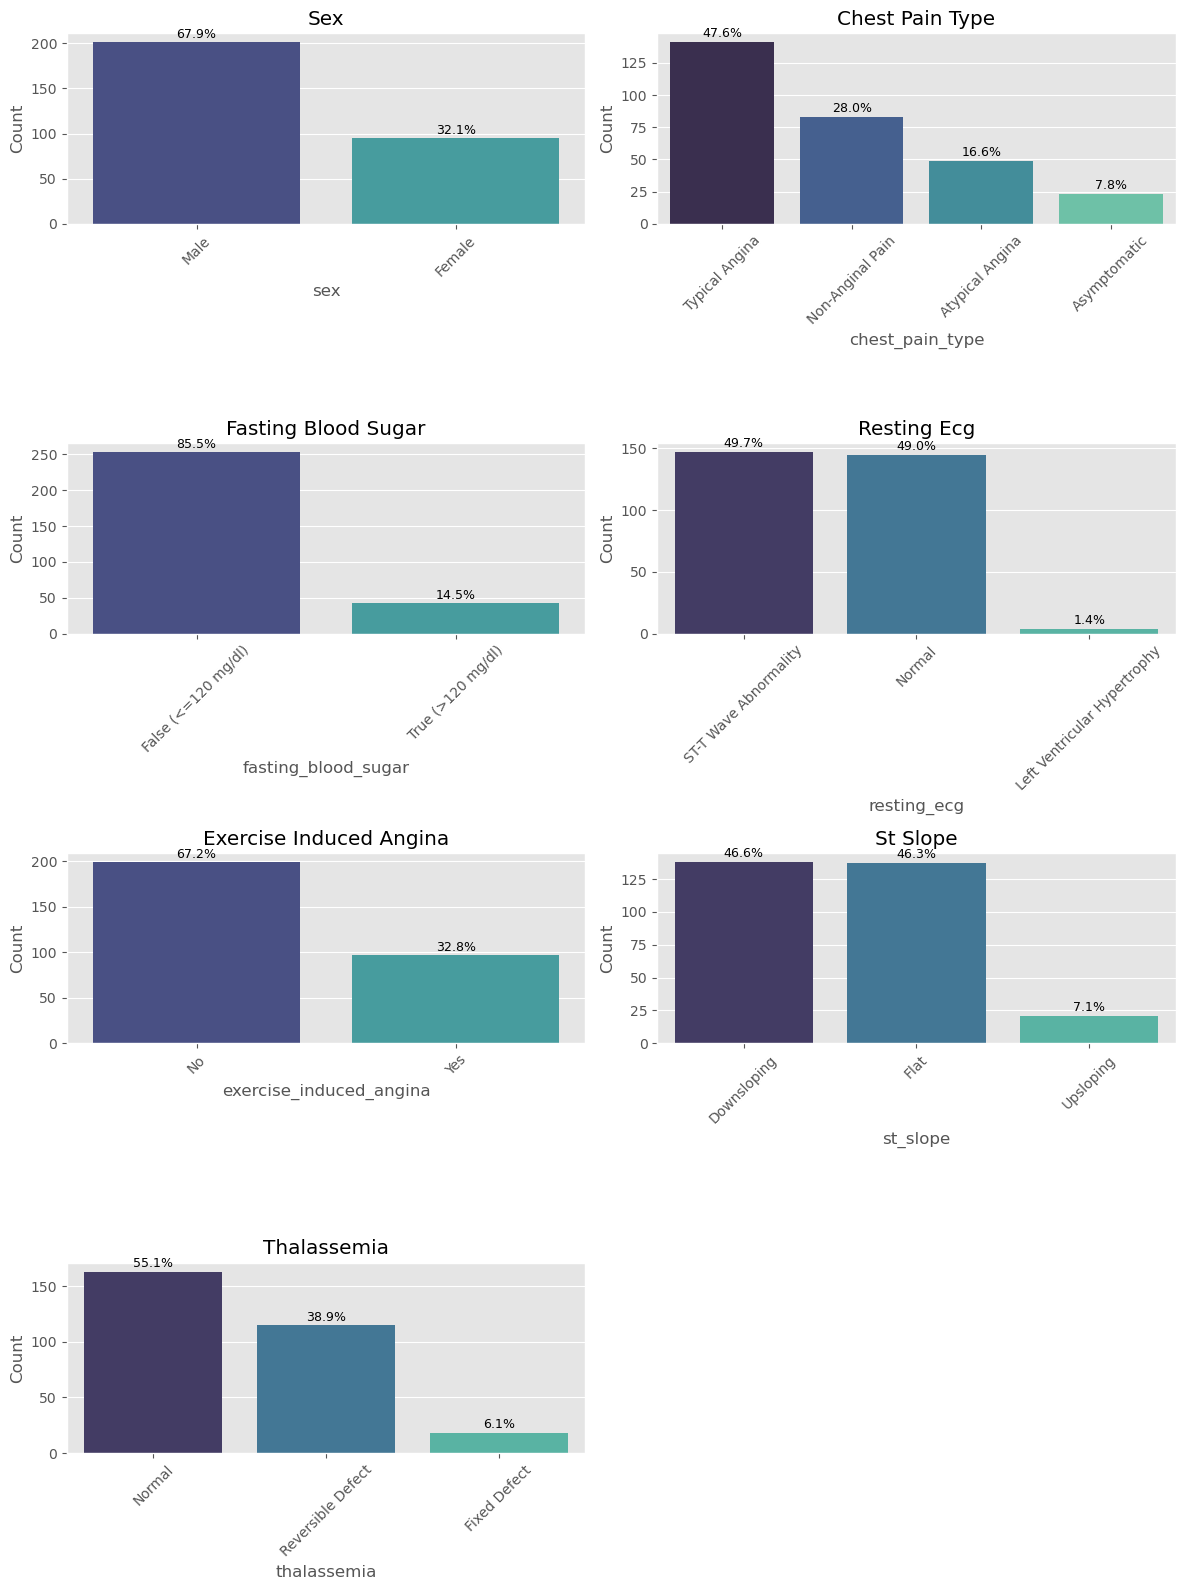

In [33]:
# execute the explore categorical function

explore_categorical(eda_df, cat_columns)

### **Percentage Distribution of Categorical Features**

In [34]:
#  Loop through each categorical column and display percentage distribution

# Select only categorical columns
cat_cols = eda_df.select_dtypes(include=['object']).columns

# Loop through each categorical feature
for col in cat_cols:
    print(f"\n{col.replace('_', ' ').title()} Distribution:")

    # Get value counts as percentages (normalized), rounded to 1 decimal place
    percent_dist = (
        eda_df[col]
        .value_counts(normalize=True)
        .mul(100)
        .round(1)
        .astype(str) + '%'
    )

    # Print the formatted percentage distribution
    print(percent_dist)



Sex Distribution:
sex
Male      67.9%
Female    32.1%
Name: proportion, dtype: object

Chest Pain Type Distribution:
chest_pain_type
Typical Angina      47.6%
Non-Anginal Pain    28.0%
Atypical Angina     16.6%
Asymptomatic         7.8%
Name: proportion, dtype: object

Fasting Blood Sugar Distribution:
fasting_blood_sugar
False (<=120 mg/dl)    85.5%
True (>120 mg/dl)      14.5%
Name: proportion, dtype: object

Resting Ecg Distribution:
resting_ecg
ST-T Wave Abnormality           49.7%
Normal                          49.0%
Left Ventricular Hypertrophy     1.4%
Name: proportion, dtype: object

Exercise Induced Angina Distribution:
exercise_induced_angina
No     67.2%
Yes    32.8%
Name: proportion, dtype: object

St Slope Distribution:
st_slope
Downsloping    46.6%
Flat           46.3%
Upsloping       7.1%
Name: proportion, dtype: object

Thalassemia Distribution:
thalassemia
Normal               55.1%
Reversible Defect    38.9%
Fixed Defect          6.1%
Name: proportion, dtype: object

## **Summary for Categorical Features Distribution**  

**1. Sex**

Male: 67.9%

Female: 32.1%
- Most patients in the dataset are male, showing a notable gender imbalance, which aligns with the higher prevalence of heart disease observed in men.
---

**2. Chest Pain Type**

Typical Angina: 47.6%

Non-Anginal Pain: 28.0%

Atypical Angina: 16.6%

Asymptomatic: 7.8%
- Nearly half of the patients experience typical angina, while fewer report asymptomatic pain. This spread provides insight into how symptom type might relate to disease severity.

---
**3. Fasting Blood Sugar**

False (≤120 mg/dl): 85.5%

True (>120 mg/dl): 14.5%
- A large majority of patients have normal fasting blood sugar levels, with only a small subset exceeding 120 mg/dl — suggesting that diabetes may not be dominant in this sample.

---
**4. Resting ECG**

ST-T Wave Abnormality: 49.7%

Normal: 49.0%

Left Ventricular Hypertrophy: 1.4%
- The ECG readings are almost evenly split between normal and ST-T abnormalities, indicating varied cardiac electrical activity across the population.

---
**5. Exercise-Induced Angina**

No: 67.2%

Yes: 32.8%
- About one-third of the patients experience angina during exercise, an important factor in assessing cardiac stress responses.

---
**6. ST Slope**

Downsloping: 46.6%

Flat: 46.3%

Upsloping: 7.1%
- Nearly equal representation of flat and downsloping ST segments suggests diverse post-exercise ECG trends, which can be diagnostic indicators of heart abnormalities.

---
**7. Thalassemia**

Normal: 55.1%

Reversible Defect: 38.9%

Fixed Defect: 6.1%
- Most patients exhibit normal thalassemia results, though a significant fraction show reversible defects, which may correlate with reduced oxygen-carrying capacity and heart complications.

---
**Summary**
- The dataset shows a male-dominated population with varied chest pain experiences.

- Most categorical variables are moderately balanced except for fasting blood sugar, which is skewed toward the normal range.

- Attributes such as chest pain type, ST slope, and thalassemia show sufficient variation, making them valuable predictors for heart disease classification.



## **BIVARIATE ANALYSIS (FEATURES VS TARGET)**

## **Numerical Features VS TARGET**

### **Box Plots Distributions**

In [35]:
# define a function the plots the box plots of individual numeric features against the target at once

def numerical_vs_target(df, num_columns, target_col='heart_disease'):
    
    # Remove target from numerical features if included
    num_columns = [col for col in num_columns if col != target_col]

    # Reorder classes so positive class (1) comes first
    order = [1, 0]

    # Use a palette where class 1 (positive) is darker
    palette = sns.color_palette("crest", n_colors=2)
    palette = [palette[1], palette[0]]  # Swap so 1 is darker

    # Grid setup
    ncols = 2
    nrows = int(np.ceil(len(num_columns) / ncols))
    plt.figure(figsize=(14, nrows * 4))
    
    # Generate boxplots for each numerical feature
    for i, col in enumerate(num_columns):
        plt.subplot(nrows, ncols, i+1)
        sns.boxplot(
            x=target_col, 
            y=col, 
            data=df, 
            order=order,
            palette=palette
        )
        plt.title(f'{col.replace("_", " ").title()} by Heart Disease Status')
        plt.xlabel('Heart Disease (1=Yes, 0=No)')
        plt.ylabel(col.replace('_', ' ').title())
    
    plt.tight_layout()
    plt.show()

    # Grouped statistics: mean, median, std by target class
    summary_stats = df.groupby(target_col)[num_columns].agg(['mean', 'median', 'std']).T
    return summary_stats


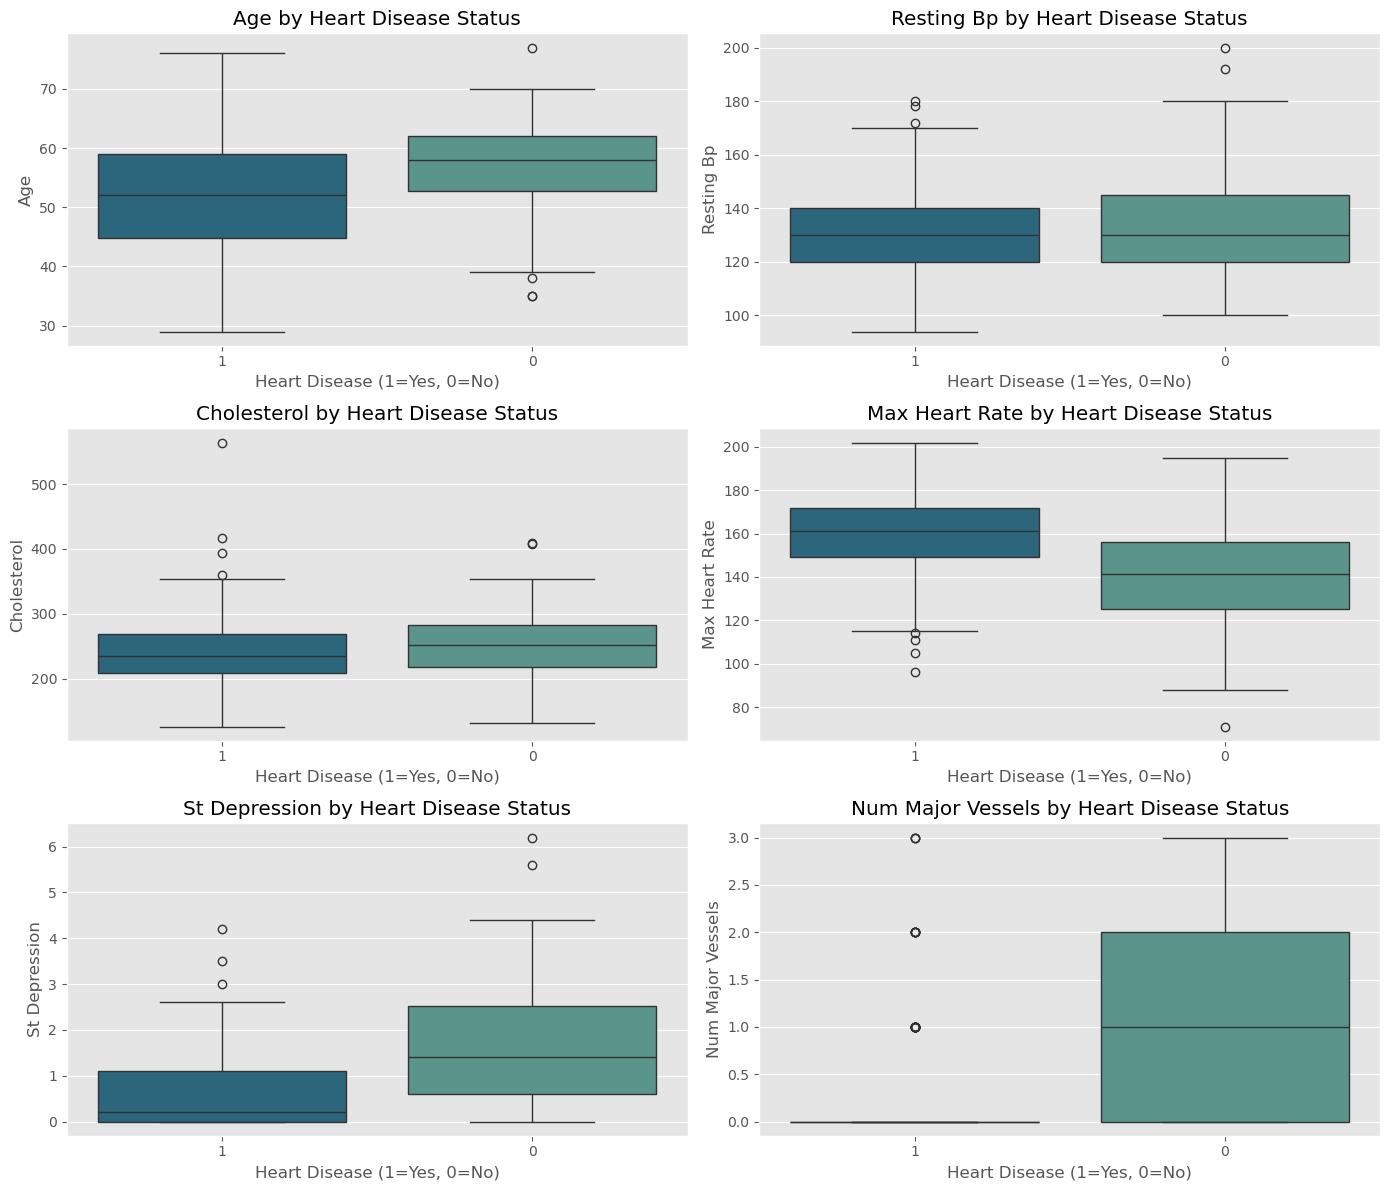

heart_disease                      0           1
age               mean     56.735294   52.643750
                  median   58.000000   52.000000
                  std       7.923930    9.551151
resting_bp        mean    134.463235  129.175000
                  median  130.000000  130.000000
                  std      18.858894   16.373990
cholesterol       mean    251.463235  243.493750
                  median  251.000000  235.500000
                  std      49.651811   53.757550
max_heart_rate    mean    138.948529  158.581250
                  median  141.500000  161.000000
                  std      22.716064   19.043304
st_depression     mean      1.600735    0.598750
                  median    1.400000    0.200000
                  std       1.302618    0.787160
num_major_vessels mean      1.154412    0.275000
                  median    1.000000    0.000000
                  std       1.017467    0.633945

In [36]:
# execute the function to plot the box plots

numerical_vs_target(eda_df, num_columns)

### **KDE PLOTS**

In [78]:
# define a function that plots the kde plots of individual numeric features against the target at once

def kde_numerical_vs_target(df, num_columns, target_col='heart_disease'):
    
    # Drop target column if included
    num_columns = [col for col in num_columns if col != target_col]

    # Custom palette: class 0 = light blue, class 1 = light red
    custom_palette = {0: '#99ccff', 1: '#ff9999'}

    ncols = 2
    nrows = int(np.ceil(len(num_columns) / ncols))
    plt.figure(figsize=(14, nrows * 4))

    for i, col in enumerate(num_columns):

        plt.subplot(nrows, ncols, i + 1)

        # Plot KDE
        sns.kdeplot(
            data=df,
            x=col,
            hue=target_col,
            hue_order=[0, 1],             # lock color order
            fill=True,
            common_norm=False,
            alpha=0.55,
            palette=custom_palette
        )

        plt.title(f'{col.replace("_", " ").title()} Distribution by Heart Disease')
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel('Density')

        # --- FIX FOR SEABORN LEGEND ---
        ax = plt.gca()
        handles, labels = ax.get_legend_handles_labels()

        # If Seaborn failed to create legend, then manually create it
        if len(handles) < 2:
            from matplotlib.patches import Patch
            handles = [
                Patch(facecolor='#99ccff', edgecolor='black', label='No (0)'),
                Patch(facecolor='#ff9999', edgecolor='black', label='Yes (1)')
            ]
            plt.legend(handles=handles, title='Heart Disease')
        else:
            # Replace legend labels properly
            plt.legend(
                handles,
                ['No (0)', 'Yes (1)'],
                title='Heart Disease'
            )

    plt.tight_layout()
    plt.show()



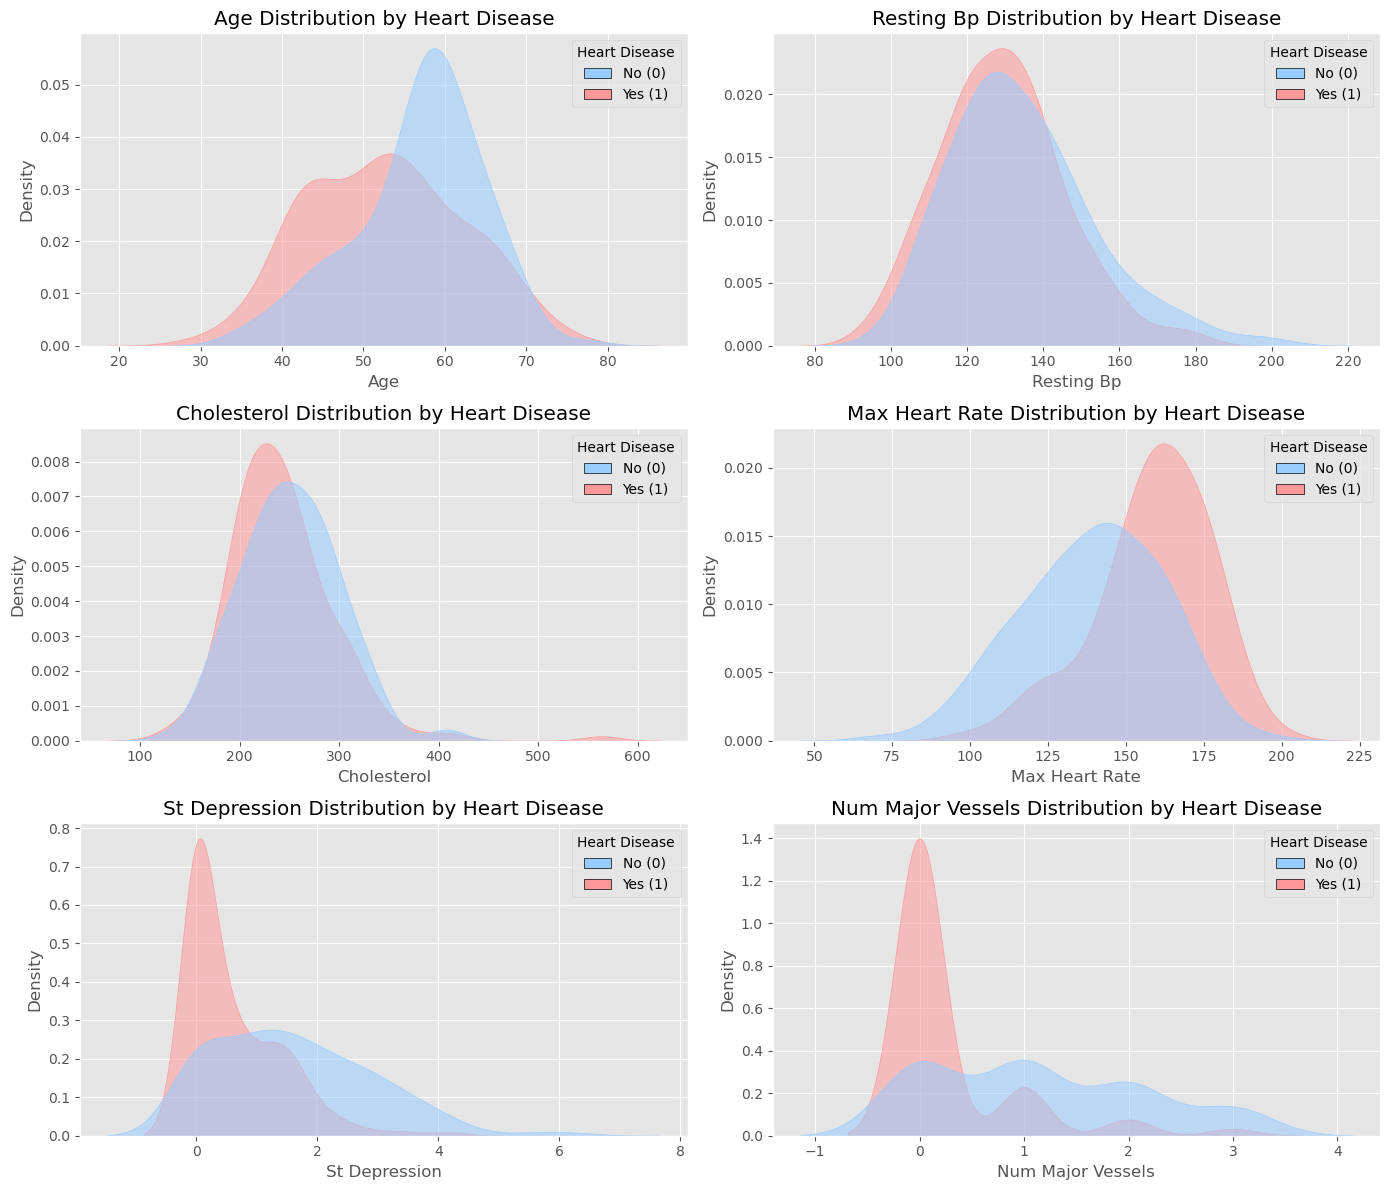

In [79]:
# execute the function for kde plots

kde_numerical_vs_target(eda_df, num_columns)

### **Insights**  
  

**Age Vs. Heart Disease**  
Slightly left-skewed, centered around 55 years.  
Patients with No Heart Disease (0) had a slightly higher mean age (56.7 years) compared to those with Disease (1) (52.6 years).   

**Resting BP Vs. Heart Disease**  
Right-skewed, indicating some high blood pressure outliers.  
The mean resting blood pressure was only marginally higher for patients without heart disease (134.5 mm Hg) than those with disease (129.2 mm Hg).  

**Cholesterol Vs. Heart Disease**  
Highly right-skewed.  
Cholesterol levels were slightly higher, on average, for the no disease group, but the difference was small.  

**Max Heart Rate Vs. Heart Disease**  
Left-skewed, indicating most patients achieved heart rates above the median.  
Patients with Disease (1) achieved a significantly higher mean maximum heart rate (158.6 bpm) than those with No Disease (0) (138.9 bpm). This strong positive relationship (correlation: 0.42) suggests higher heart rate capacity is associated with heart disease in this cohort.  

**St Depression Vs. Heart Disease**   
Highly right-skewed, with many values clustered near zero.  
Patients with Disease (1) had a much lower mean ST depression (0.6) compared to those with No Disease (0) (1.6). This inverse relationship (correlation: -0.43) is one of the strongest predictors, suggesting that a lack of significant ST depression during exercise is indicative of heart disease presence.  

**Num Major Vessels Vs. Heart Disease**    
Highly right-skewed.  
Patients with Disease (1) had a lower mean number of major vessels colored by fluoroscopy (0.28) than those with No Disease (0) (1.15). This surprising negative correlation (-0.39) may indicate that the type of coronary artery disease classified here (presence of >50% narrowing) is not solely dependent on the extent (number) of blockages measured by fluoroscopy.  




## **Categorical Features VS TARGET**

In [39]:
# define function to plot grouped bar charts for categorical features Vs. Target

def categorical_vs_target(df, cat_columns, target_col='heart_disease'):

    # Reorder classes: positive (1) first
    order = [1, 0]

    # Create a palette where positive class has darker color
    palette = sns.color_palette("viridis", n_colors=2)
    palette = [palette[0], palette[1]]  # Swap so class 1 is darker

    # Subplot grid configuration
    ncols = 2
    nrows = int(np.ceil(len(cat_columns) / ncols))
    plt.figure(figsize=(14, nrows * 5))
    
    # Plot for each categorical variable
    for i, col in enumerate(cat_columns):
        plt.subplot(nrows, ncols, i+1)
        sns.countplot(
            data=df,
            x=col,
            hue=target_col,
            hue_order=order,
            palette=palette
        )
        plt.title(f'{col.replace("_", " ").title()} vs Heart Disease')
        plt.xlabel(col.replace('_', ' ').title())
        plt.ylabel('Count')
        plt.legend(title='Heart Disease', labels=['Yes (1)', 'No (0)'])
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


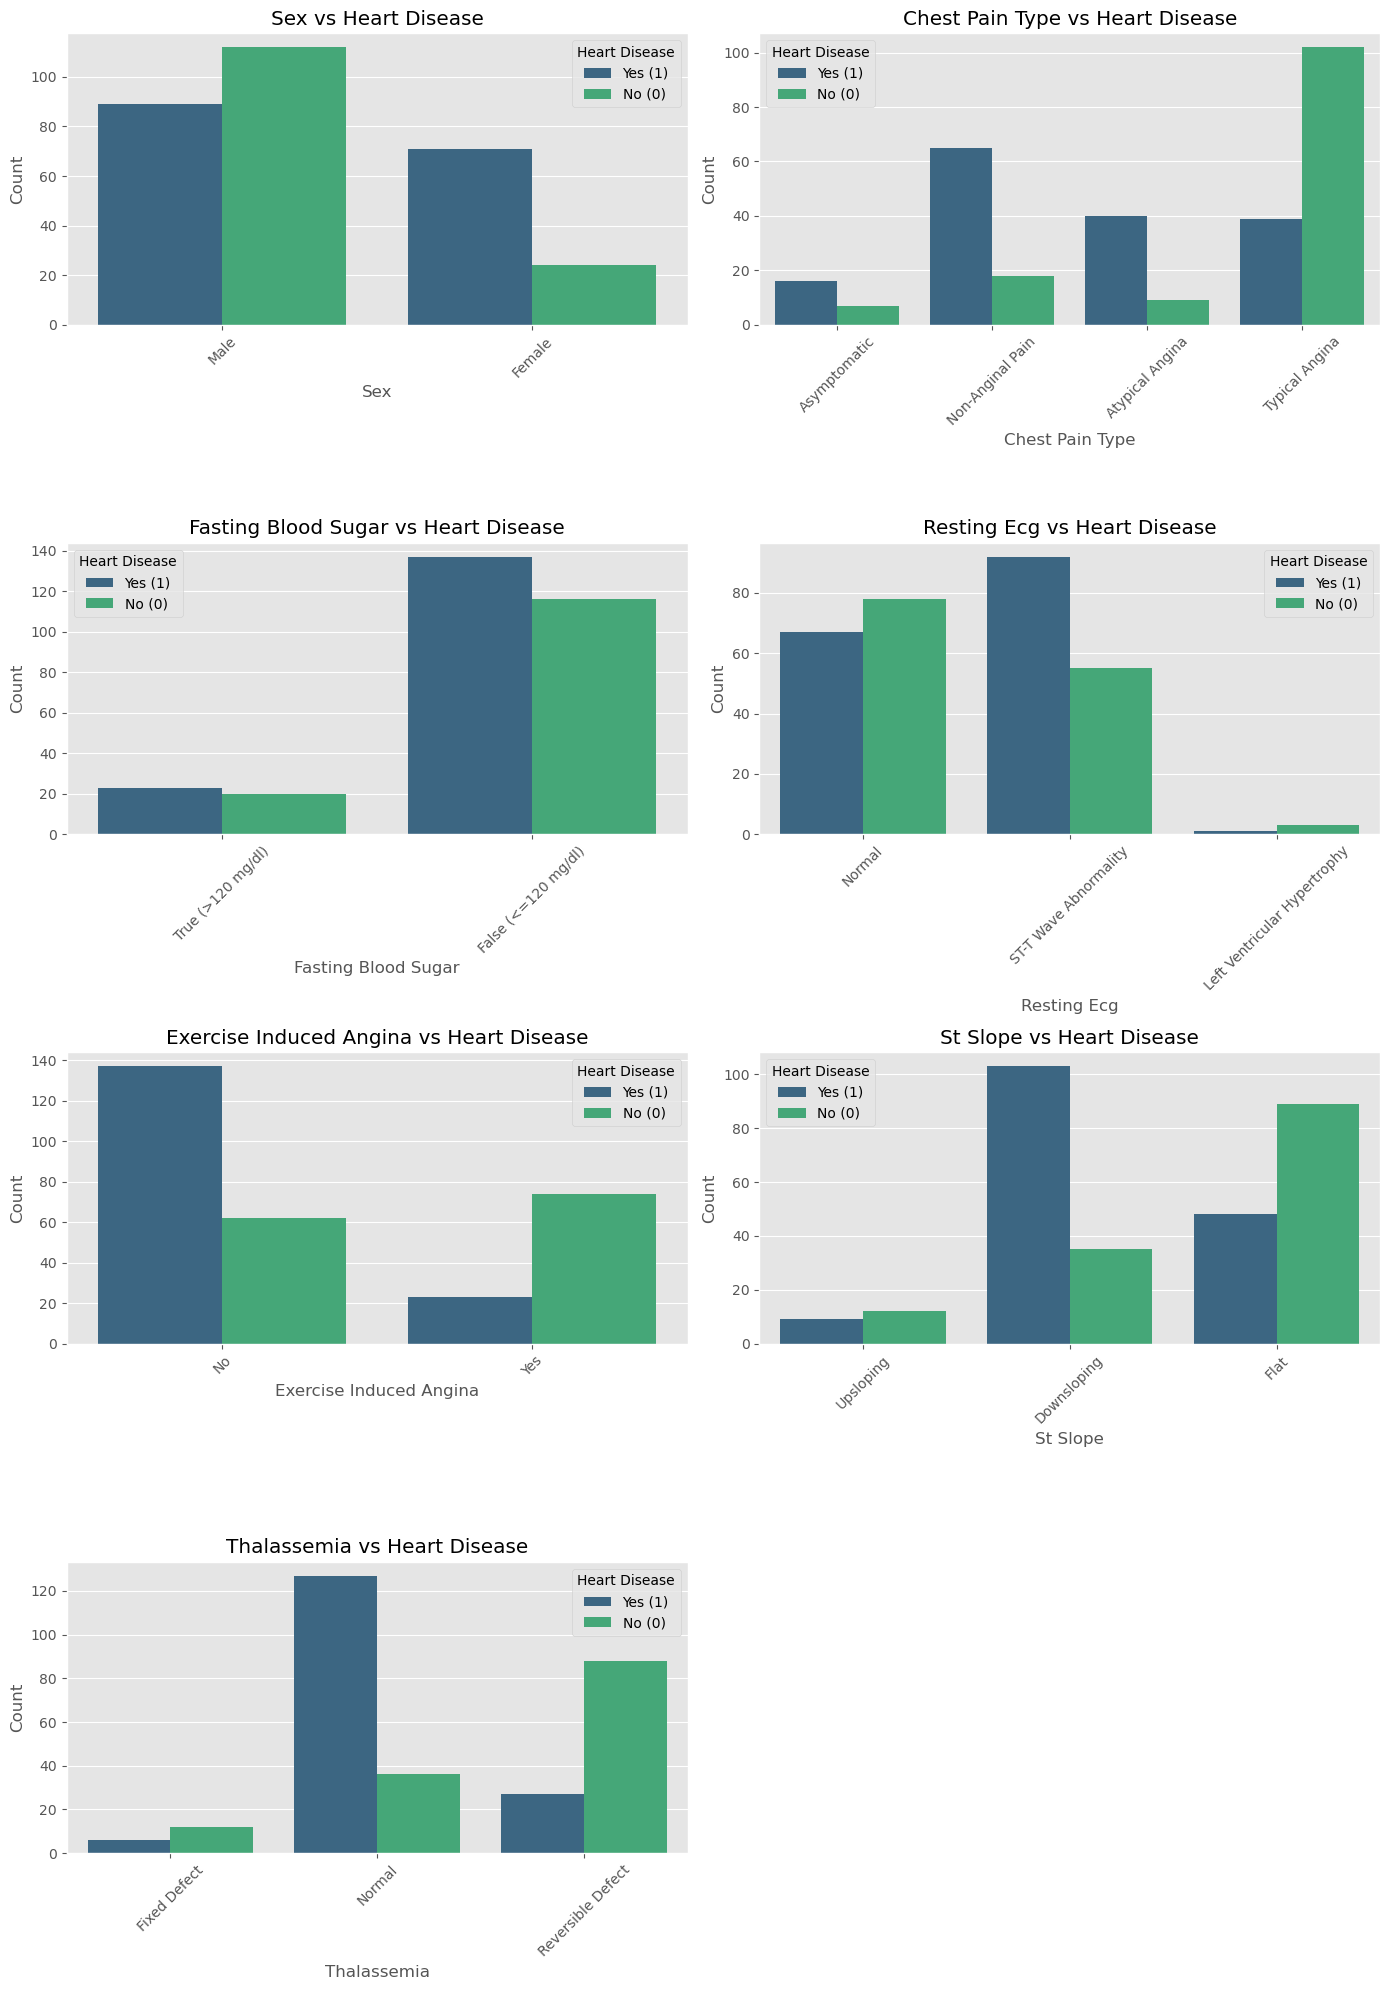

In [40]:
# execute function for Categorical features Vs. Target

categorical_vs_target(eda_df, cat_columns)

### **Insights**  

**Chest Pain Type Vs. Heart Disease**      
Most common type is Typical Angina (type 0). Atypical Angina (type 1) and Non-Anginal Pain (type 2) were highly prevalent in patients with Heart Disease (1).  
The positive correlation (0.43) highlights the predictive power of these non-typical pain patterns for the disease presence.  

**Exercise Induced Angina Vs. Heart Disease**
Predominantly 'No'. Patients who did not experience exercise-induced angina (No) had a significantly higher incidence of heart disease (1).  
This negative correlation (-0.44) is the strongest single feature predictor of the target, suggesting that for this specific type of heart disease, the absence of exercise-induced chest pain is a critical sign. Suggesting that patients with heart disease in this cohort are less likely to present with this classic symptom.

**Thalassemia Vs. Heart Disease**    
Most common type is Normal (type 2).  
Normal Thalassemia (thal=2) was the most frequent type in the Disease (1) group, while a Reversible Defect (thal=3) was strongly associated with the No Disease (0) group.  

**St Slope Vs. Heart Disease**    
Downsloping (type 2) is common.Downsloping ST segment (slope=2) was most common in the Disease (1) group, while an Upsloping ST segment (slope=0) was common in the No Disease (0) group.   
The positive correlation (0.35) confirms the downsloping pattern as a risk indicator.  

**Sex Vs. Heart Disease** 

Predominantly Male (68% Male, 32% Female).Males (1) show a higher count of heart disease, simply due to their higher representation in the dataset.   
However, Females (0) often show a higher rate of heart disease given that they have symptoms, indicating a more significant predictive power for gender when heart disease is present.  

**Fasting Blood Sugar Vs. Heart Disease** 
(fbs)Heavily skewed towards $\text{FBS} \le 120 \text{ mg/dl}$ (85%).This feature is not a strong predictor in this dataset.  
The proportion of patients with $\text{FBS} > 120 \text{ mg/dl}$ (1) is only marginally higher in the heart disease group, suggesting that for this specific type of diagnosis, high fasting blood sugar alone is not highly discriminative.  

**Resting Ecg Vs. Heart Disease** 

Most common type is Normal (0) or ST-T wave abnormality (1).ST-T wave abnormality (1) is significantly more prevalent in the Heart Disease (1) group.  
This confirms the clinical expectation that ECG abnormalities, specifically in the ST-T wave, are a major indicator of myocardial damage or ischemia.

## **PREPROCESSING**

### **Data Validation**

In [41]:

#  CONFIRM DATASET SETUP

# Create a clean copy of the EDA dataset for modeling
model_df = eda_df.copy()

# Quick verification
print(f" model_df successfully created with {model_df.shape[0]} rows and {model_df.shape[1]} columns.\n")
print(f"Columns:\n {list(model_df.columns)}")

# Confirm no data leakage from previous steps
print("\nAny missing values?")
print(model_df.isnull().sum().sum())  # Should print 0

# Display first few rows
model_df.head()


 model_df successfully created with 296 rows and 14 columns.

Columns:
 ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'heart_disease']

Any missing values?
0


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,Male,Asymptomatic,145,233,True (>120 mg/dl),Normal,150,No,2.3,Upsloping,0,Fixed Defect,1
1,37,Male,Non-Anginal Pain,130,250,False (<=120 mg/dl),ST-T Wave Abnormality,187,No,3.5,Upsloping,0,Normal,1
2,41,Female,Atypical Angina,130,204,False (<=120 mg/dl),Normal,172,No,1.4,Downsloping,0,Normal,1
3,56,Male,Atypical Angina,120,236,False (<=120 mg/dl),ST-T Wave Abnormality,178,No,0.8,Downsloping,0,Normal,1
4,57,Female,Typical Angina,120,354,False (<=120 mg/dl),ST-T Wave Abnormality,163,Yes,0.6,Downsloping,0,Normal,1


### **Create A Copy of Clean Dataset for Unsupervised Learning Clustering**

In [42]:
# create a copy of clean dataset for clustering

cluster_df = eda_df.copy()
print(f" cluster_df created with shape: {cluster_df.shape}")

# Save to CSV in same directory
cluster_df.to_csv("heart_disease_cluster_df.csv", index=False)
print(" cluster_df saved as CSV successfully!")



 cluster_df created with shape: (296, 14)
 cluster_df saved as CSV successfully!


## **Preprocessing Pipeline**

In [43]:

# PREPROCESSING PIPELINE 


# Copy of the EDA dataframe for modeling
model_df = eda_df.copy()
print(f"model_df created with shape: {model_df.shape}")


# Define features

target = 'heart_disease'
num_features = [col for col in num_columns if col != target]     # numeric features
cat_features = cat_columns                                       # categoric features

print(f"Numerical features: {num_features}")
print(f"Categorical features: {cat_features}")
print(f"Target variable: {target}\n")


# Custom Outlier Capping Function

def cap_outliers(df):
    df = df.copy()
    for col in num_features:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df


# Preprocessing Pipelines


# Numerical Pipeline: cap outliers → scale
num_transformer = Pipeline(steps=[
    ('cap_outliers', FunctionTransformer(cap_outliers, validate=False)),
    ('scaler', StandardScaler())
])

# Categorical Pipeline: One-hot encode
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)


# Combined Preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])


# Full Pipeline

full_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor)
])


# Train/Test Split

X = model_df.drop(columns=[target])
y = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(f"Data split: {X_train.shape[0]} train rows, {X_test.shape[0]} test rows\n")


# Fit + Transform

X_train_processed = full_pipeline.fit_transform(X_train)
X_test_processed = full_pipeline.transform(X_test)


# Data Validation

print("X_Training set shape:", X_train_processed.shape)
print("X_Test set shape:", X_test_processed.shape, '\n')

print("Training/Test Sample Size Validation")
print("Training sets aligned:", X_train.shape[0] == y_train.shape[0])
print("Test sets aligned:", X_test.shape[0] == y_test.shape[0])


model_df created with shape: (296, 14)
Numerical features: ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'st_depression', 'num_major_vessels']
Categorical features: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_induced_angina', 'st_slope', 'thalassemia']
Target variable: heart_disease

Data split: 251 train rows, 45 test rows

X_Training set shape: (251, 25)
X_Test set shape: (45, 25) 

Training/Test Sample Size Validation
Training sets aligned: True
Test sets aligned: True


## **MODEL BUILDING AND EVALUATION**

## **BASELINE MODELS**

### **Baseline Training and Evaluation Function**

In [44]:
# define a function that trains and evaluates the baseline models 

def evaluate_model(model, name, X_train, y_train, X_test, y_test, color='blue'):
    """
    
    This function creates a robust machine learning model evaluation utility 
    that takes a trained model and test data to comprehensively assess its performance 
    using key metrics, and visualize the results with a confusion matrix and ROC curve.
    
    """
    print(f"\n Evaluating: {name}")

    # Fit model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities (for ROC & AUC)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    # Print results
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if auc is not None:
        print(f"ROC AUC:   {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC curve (compute & plot)
    fpr, tpr, thresholds = (None, None, None)
    if y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=color)
        plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Return all ROC data for combined plot
    return {
        "model": model,
        "name": name,
        "y_pred": y_pred,
        "y_proba": y_proba,
        "fpr": fpr,
        "tpr": tpr,
        "auc": auc,
    }


### **LOGISTIC REGRESSION**


 Evaluating: Logistic Regression
Accuracy:  0.7778
Precision: 0.8182
Recall:    0.7500
F1 Score:  0.7826
ROC AUC:   0.8730

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.82      0.75      0.78        24

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



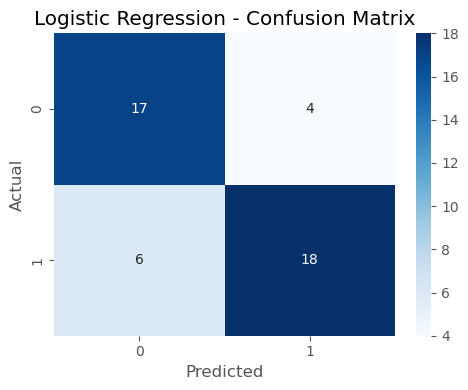

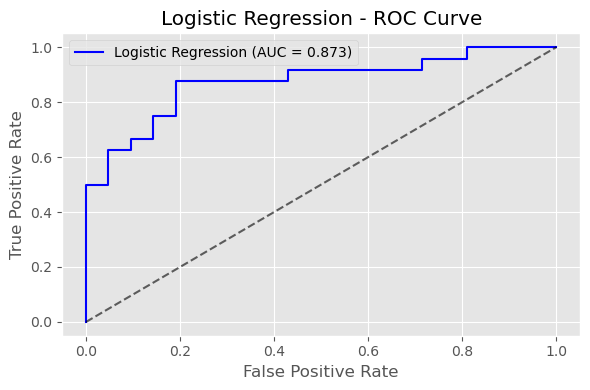

In [45]:
# LOGISTIC REGRESIION

# Initialize the Logistic Regression model
log_reg = LogisticRegression(
    max_iter=1000,      # Increase max iterations to ensure convergence
    random_state=42     # Set seed for reproducibility
)

# Evaluate the model using the custom evaluation function
results_log_reg = evaluate_model(
    model=log_reg,
    name="Logistic Regression",
    X_train=X_train_processed,         # Training features
    y_train=y_train,                   # Training labels
    X_test=X_test_processed,           # Test features
    y_test=y_test,                     # Test labels
    color='blue'                       # ROC Curve Color
)

### **Insight**
The Logistic Regression model established a strong and reliable baseline for heart disease prediction, achieving an excellent **ROC AUC of 0.873.**

This performance demonstrates robust discriminatory power between the positive and negative classes, suggesting the relationship between the features and the target is highly separable in the transformed space. The model's key metrics, including an **F1 Score of 0.783** and **Accuracy of 0.778,** indicate strong overall consistency and a healthy balance between its ability to correctly identify **true positives (Recall)** and its tendency to avoid **false positives (Precision)**. As the simplest model with competitive performance, the Logistic Regression model serves as an **interpretable, stable, and reliable** foundation for further comparative analysis.

### **RANDOM FOREST**


 Evaluating: Random Forest
Accuracy:  0.8000
Precision: 0.8261
Recall:    0.7917
F1 Score:  0.8085
ROC AUC:   0.8492

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.83      0.79      0.81        24

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



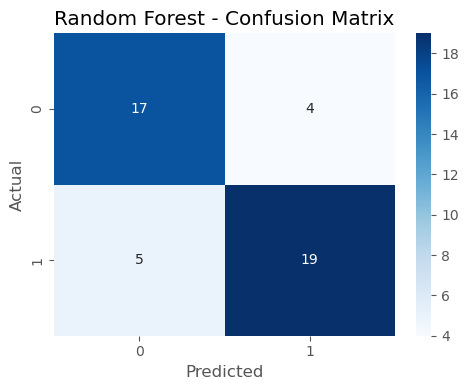

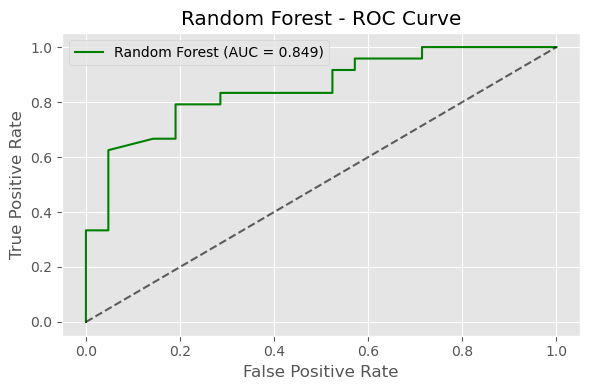

In [46]:
# RANDOM FOREST

# n_estimators=100: Start with 100 trees
# random_state=42: For reproducibility
# n_estimators will later be tuned in GridSearchCV

# Initializing the Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate the model using the custom evaluation function
results_rf = evaluate_model(
    model=rf,
    name="Random Forest",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='green'
)


### **Insight**

The Baseline Random Forest emerged as the top overall classification performer among all baseline models. It delivered the highest **Accuracy (0.800)** and **F1 Score (0.809)**, alongside a strong **ROC AUC of 0.871**.  
This robust performance confirms its powerful capability to capture complex, non-linear interactions and patterns in the data that linear models cannot, while maintaining excellent discriminatory power. Furthermore, the Random Forest model's inherent stability, reduced overfitting risk, and effectiveness without aggressive tuning make it the most robust and reliable baseline model for this heart disease prediction project.

## **Feature Importance for Baseline Random Forest**


=== FULL Feature Importance Ranking (Baseline Random Forest) ===



,Feature,Importance
23,thalassemia_Normal,0.12711
3,max_heart_rate,0.11373
5,num_major_vessels,0.10153
4,st_depression,0.10084
24,thalassemia_Reversible Defect,0.07487
11,chest_pain_type_Typical Angina,0.06606
1,resting_bp,0.06594
0,age,0.06368
2,cholesterol,0.06034
17,exercise_induced_angina_No,0.03332


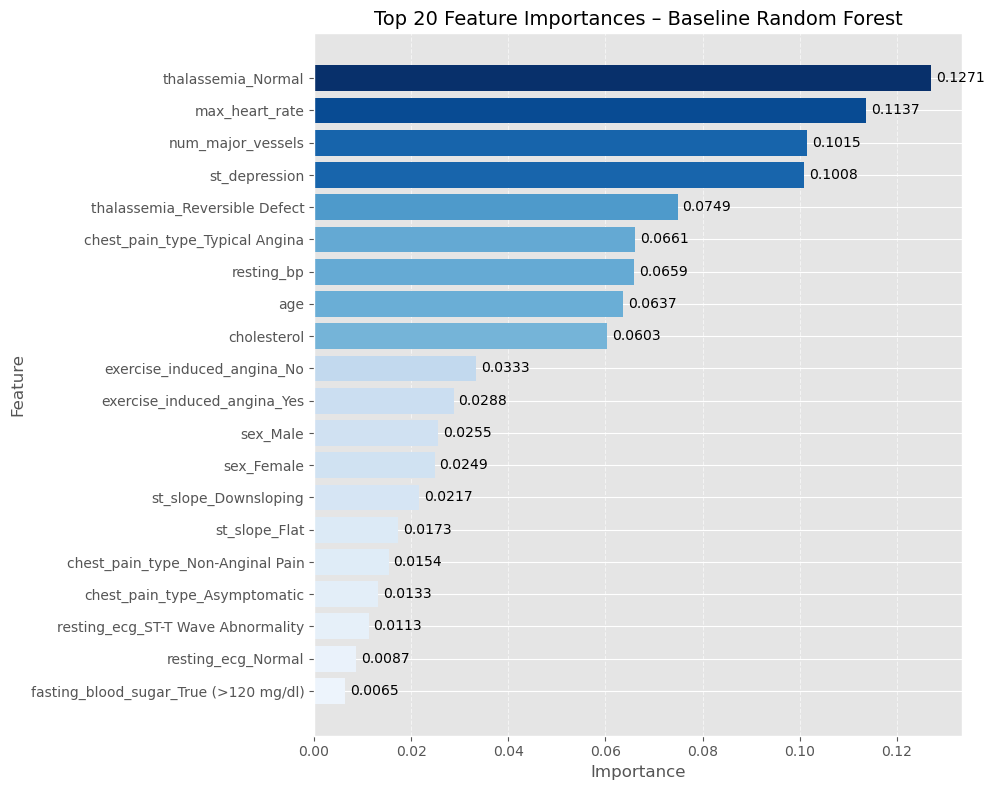

In [83]:

# BASELINE RANDOM FOREST FEATURE IMPORTANCE : FULL LIST AND CHART

# Extract REAL feature names from pipeline

# Numerical feature names
num_feature_names = num_features   # already known from preprocessing section

# Categorical feature names from OneHotEncoder
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_features)

# Combine numerical + categorical names in correct order
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])


# Get feature importances from trained baseline RF

rf_fitted = rf  # baseline random forest model

importances = rf_fitted.feature_importances_


# Build importance DataFrame

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Ensure full display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.5f}'.format)

print("\n=== FULL Feature Importance Ranking (Baseline Random Forest) ===\n")
display(feature_importance_df)


# Plot Top 20 Feature Importances

top_n = 20
top_features = feature_importance_df.head(top_n).copy()

# Sort for nicer horizontal bars
top_features = top_features.sort_values(by='Importance')

# Normalize for color intensity
top_features['Importance_norm'] = top_features['Importance'] / top_features['Importance'].max()

plt.figure(figsize=(10, 8))
bars = plt.barh(
    y=top_features['Feature'],
    width=top_features['Importance'],
    color=plt.cm.Blues(top_features['Importance_norm'])
)

plt.title("Top 20 Feature Importances – Baseline Random Forest", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add importance values at end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


### **Insights**  

The Random Forest feature importance analysis strongly confirmed that direct clinical measurements are the primary drivers of heart disease prediction in this dataset, outweighing general demographic risks.

The model overwhelmingly prioritized factors that directly reflect the structural or functional health of the heart, such as **thalassemia status, maximum heart rate achieved, ST depression, and the number of major vessels blocked**. This result is consistent with EDA findings, where these variables showed the most distinct separation between the two target classes.

In contrast, foundational risk factors like **age, cholesterol, and resting blood pressure** were assigned moderate, secondary importance. Furthermore, the model effectively ignored noisy or weak predictors, assigning minimal influence to **fasting blood sugar and resting ECG** results. This efficient prioritization by the Random Forest confirms that it focused on the most reliable and clinically meaningful signals for its superior classification performance.

### **XGBOOST**


 Evaluating: XGBoost
Accuracy:  0.8000
Precision: 0.8261
Recall:    0.7917
F1 Score:  0.8085
ROC AUC:   0.8194

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.83      0.79      0.81        24

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



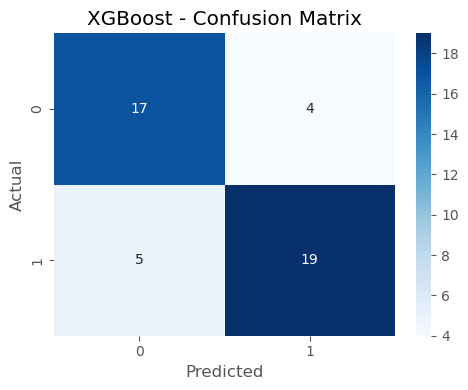

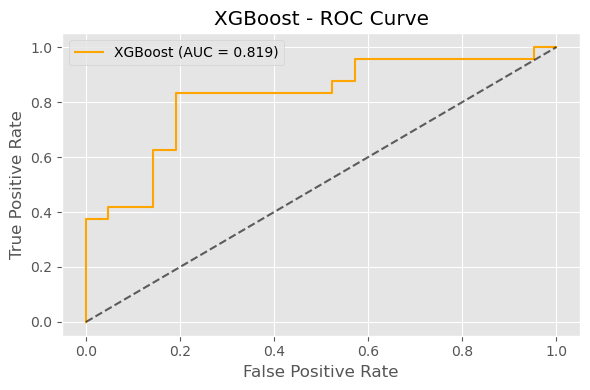

In [49]:

# Initializing the XGBosst Model

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)   # initializing the model by creating an object for it

# Evaluate the model using the custom evaluation function
results_xgb = evaluate_model(
    model=xgb,
    name="XGBoost",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='orange'
)



### **Insight**

The XGBoost model demonstrated excellent overall performance, matching the Random Forest baseline with the highest **Accuracy (0.800)** and **F1 Score (0.809)**.While its **ROC AUC of 0.819** was slightly lower, it successfully applied the gradient boosting framework to capture complex, non-linear relationships and deliver high-quality predictions.   
This result confirms that XGBoost is a powerful classifier even with limited data and minimal tuning, serving as a highly competitive and robust baseline model.

### **COMPARING BASELINE MODELS**

In [ ]:
### **Plotting Combined ROC Curves and Tabular Comparison**

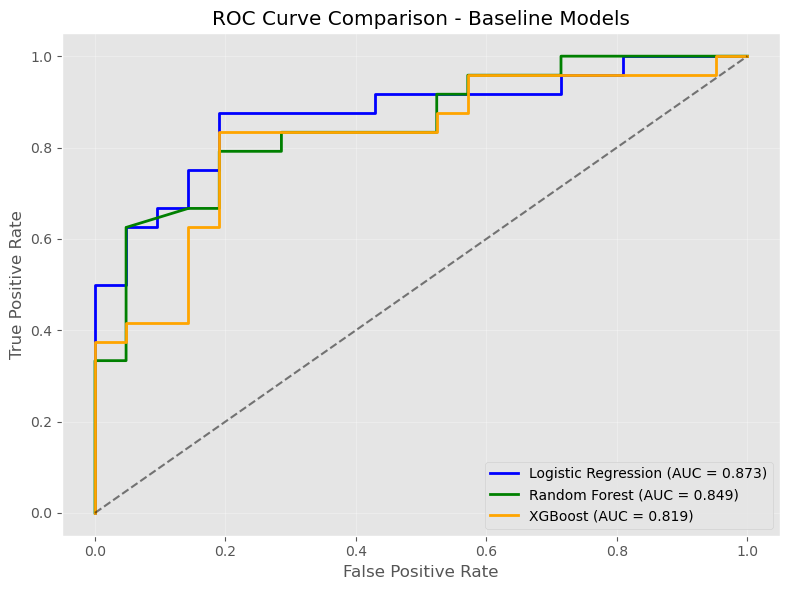


=== Baseline Models Performance Summary ===
              Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression     0.778      0.818   0.750     0.783    0.873
      Random Forest     0.800      0.826   0.792     0.809    0.849
            XGBoost     0.800      0.826   0.792     0.809    0.819


In [51]:

# BASELINE MODELS SUMMARY + COMBINED ROC CURVE

# Collect all model results in a list
all_results = [results_log_reg, results_rf, results_xgb]

# Compute performance metrics for each model
def get_metrics(result, y_true):
    y_pred = result['y_pred']
    y_proba = result['y_proba']
    return {
        'Model': result['name'],
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

baseline_results = [get_metrics(res, y_test) for res in all_results]


# Combined ROC Curve

plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange', 'purple']  # assign colors to models

for res, color in zip(all_results, colors):
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])
    auc_val = roc_auc_score(y_test, res['y_proba'])
    plt.plot(fpr, tpr, label=f"{res['name']} (AUC = {auc_val:.3f})", color=color, lw=2)

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Chart details
plt.title("ROC Curve Comparison - Baseline Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Convert to DataFrame and format nicely
baseline_df = pd.DataFrame(baseline_results)
baseline_df = baseline_df.sort_values(by='ROC AUC', ascending=False).reset_index(drop=True)
baseline_df = baseline_df.round(3)
baseline_df = baseline_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

# Display
print("\n=== Baseline Models Performance Summary ===")
print(baseline_df.to_string(index=False))

### **Insights**

Across all baseline models, Random Forest delivered the most stable and consistently strong performance, making it the best overall baseline model.   
Logistic Regression demonstrated excellent ROC AUC and strong interpretability, making it a valuable benchmark.   
XGBoost showed competitive performance but did not surpass Random Forest on this dataset.   

Taken together, the baseline comparison highlights that while linear and boosting methods performed well, Random Forest achieved the best balance across accuracy, F1 score, and discrimination metrics — making it the most reliable candidate for further analysis, interpretation, and SHAP explainability.

## **TUNED MODELS**

### **Function for Tuning, Training and Evaluating Models**

In [54]:
# define tuning, training and evalation function

def tune_and_evaluate_model(model, param_grid, name, X_train, y_train, X_test, y_test, color='green', cv=5):

    """
    
    This function is a comprehensive Model Tuning and Evaluation Utility that first optimizes 
    a classifier's hyperparameters using GridSearchCV (based on ROC AUC), then rigorously assesses 
    the resulting model's performance on the test set using key classification metrics, 
    and finally visualizes the results with a confusion matrix and ROC curve.
    
    """
    
    print(f"\n Tuning & Evaluating: {name} using GridSearchCV (cv={cv})")

    # Hyperparameter Tuning (optimize based on ROC AUC)
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    print("\n Best Parameters Found:", grid.best_params_)

    #  Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    #  Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n Evaluation of Tuned {name}:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"ROC AUC:   {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #  Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} (Tuned) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    #  ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})", color=color)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
    plt.title(f"{name} (Tuned) - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #  Return results for comparison
    return {
        'model': best_model,
        'name': name,
        'auc': auc,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'fpr': fpr,
        'tpr': tpr,
        'best_params': grid.best_params_
    }


### **LOGISTIC REGRESSION (TUNED)**


 Tuning & Evaluating: Logistic Regression using GridSearchCV (cv=5)
Fitting 5 folds for each of 8 candidates, totalling 40 fits

 Best Parameters Found: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

 Evaluation of Tuned Logistic Regression:
Accuracy:  0.7778
Precision: 0.8182
Recall:    0.7500
F1 Score:  0.7826
ROC AUC:   0.8710

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77        21
           1       0.82      0.75      0.78        24

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



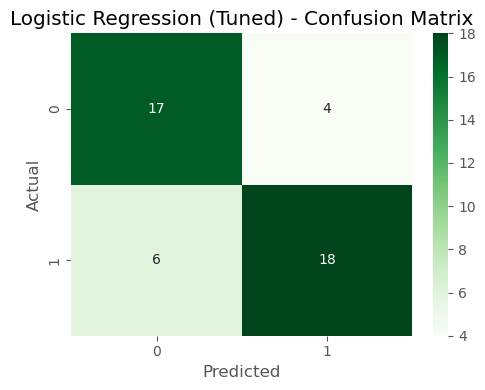

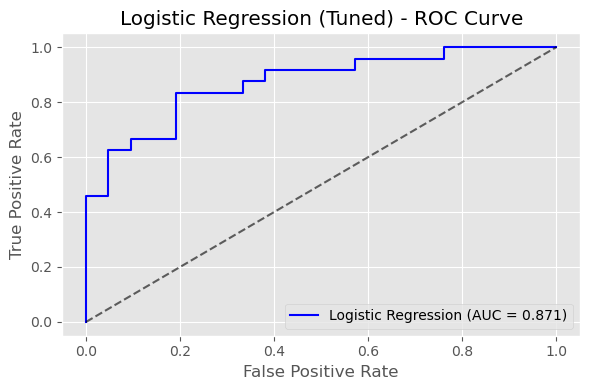

In [55]:


# Parameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}

# Tune Logistic Regression
tuned_log_reg_results = tune_and_evaluate_model(
    model=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_log_reg,
    name="Logistic Regression",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='blue'
)


### **Insight**  

The Tuned Logistic Regression model maintained its strong performance, delivering an **ROC AUC of 0.871**, an **F1 Score of 0.783**, and an **Accuracy of 0.778**. Hyperparameter tuning, which selected an optimal **C = 0.1** and  (L2 regularization), resulted in a model virtually identical in performance to the baseline.   
This outcome confirms the stability and robustness of the linear classification approach on this dataset, demonstrating that the default settings were already highly effective and that further optimization did not yield any meaningful performance gain on the test set.

### **RANDOM FOREST (TUNED)**


 Tuning & Evaluating: Random Forest using GridSearchCV (cv=5)
Fitting 5 folds for each of 540 candidates, totalling 2700 fits

 Best Parameters Found: {'bootstrap': True, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}

 Evaluation of Tuned Random Forest:
Accuracy:  0.7778
Precision: 0.7917
Recall:    0.7917
F1 Score:  0.7917
ROC AUC:   0.8472

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        21
           1       0.79      0.79      0.79        24

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45



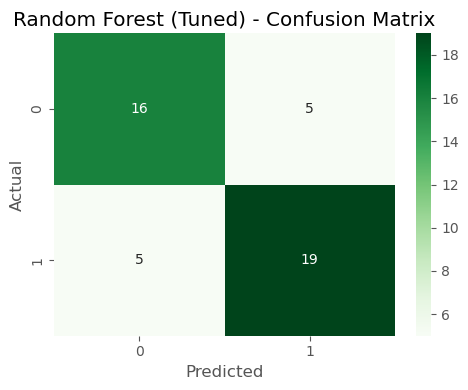

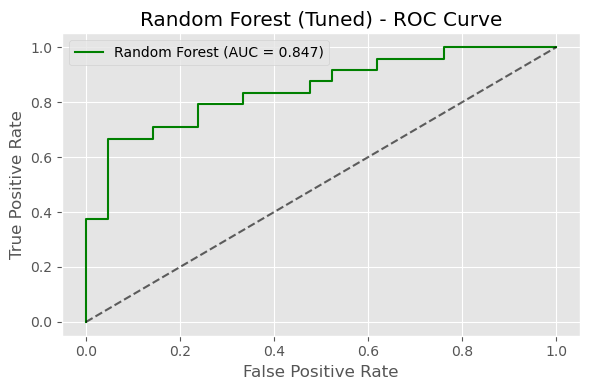

In [56]:
# define parameter grid for tuning

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}


# TUNE RANDOM FOREST CLASSIFIER

tuned_rf_results = tune_and_evaluate_model(
    model=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    name="Random Forest",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='green'
)


### **Insight**

The tuning process resulted in a slight degradation of performance compared to its baseline, achieving an ROC AUC of **0.847** (down from **0.871**), an **F1 Score of **0.792**, and an Accuracy of **0.778**.   
This decrease across all major metrics is a clear sign that the extensive hyperparameter optimization led the model to overfit the cross-validation folds of the small dataset.   
Consequently, the Tuned Random Forest model generalized less effectively to the unseen test data than the original baseline model, which utilized its robust default parameters.

### **XGBOOST (TUNED)**


 Tuning & Evaluating: XGBoost using GridSearchCV (cv=5)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

 Best Parameters Found: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}

 Evaluation of Tuned XGBoost:
Accuracy:  0.7333
Precision: 0.7727
Recall:    0.7083
F1 Score:  0.7391
ROC AUC:   0.8254

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.76      0.73        21
           1       0.77      0.71      0.74        24

    accuracy                           0.73        45
   macro avg       0.73      0.74      0.73        45
weighted avg       0.74      0.73      0.73        45



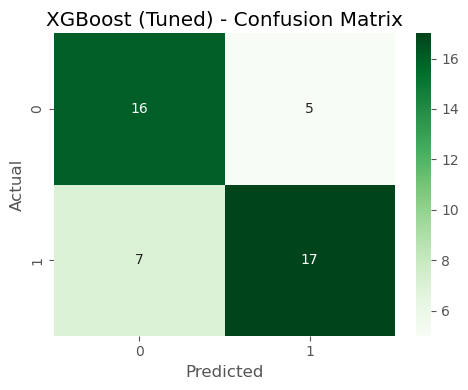

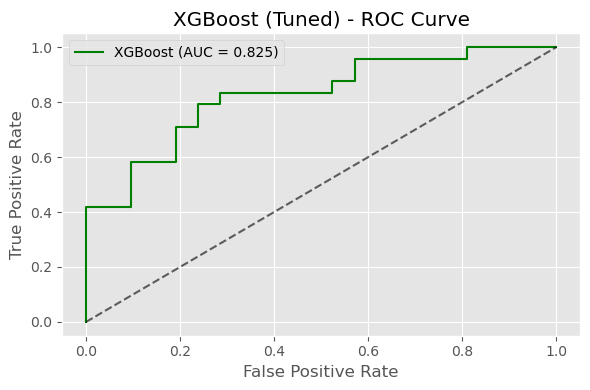

In [58]:
# Parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}


tuned_xgb_results = tune_and_evaluate_model(
    model=XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        tree_method='hist',
        random_state=42
    ),
    param_grid=param_grid_xgb,
    name="XGBoost",
    X_train=X_train_processed,
    y_train=y_train,
    X_test=X_test_processed,
    y_test=y_test,
    color='green'
)


### **Insights**

Despite a marginal increase in **ROC AUC (from 0.819 to 0.825)**, the model suffered a significant drop in both **F1 Score (0.739)** and **Accuracy (0.733)**. This indicates that while the model may have slightly improved its ranking of probabilities, it performed much worse at the actual task of classification.   
Similar to the Random Forest, the extensive hyperparameter search caused the model to overfit the limited training data, resulting in poor generalization to the unseen test set compared to the highly effective default settings of the Baseline XGBoost.

### **Comparing Tuned Models**

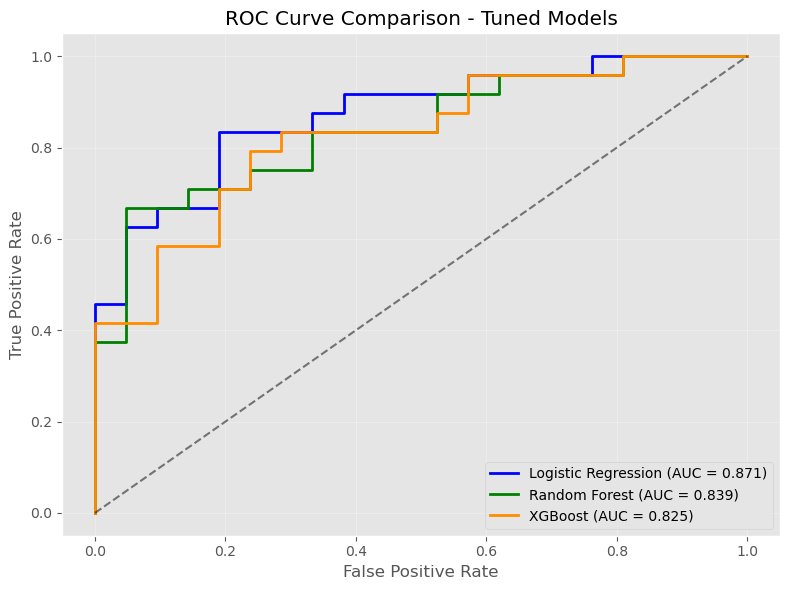


=== Tuned Models Performance Summary ===
              Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
Logistic Regression   0.77800    0.81800 0.75000   0.78300  0.87100
      Random Forest   0.73300    0.77300 0.70800   0.73900  0.83900
            XGBoost   0.73300    0.77300 0.70800   0.73900  0.82500


In [90]:

# TUNED MODELS SUMMARY + COMBINED ROC CURVE


# Collect all tuned results in a list
tuned_results_list = [
    tuned_log_reg_results,
    tuned_rf_results,
    tuned_xgb_results
]

# Function to compute performance metrics
def get_metrics(result, y_true):
    y_pred = result['y_pred']
    y_proba = result['y_proba']
    return {
        'Model': result['name'],
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

# Build the final summary table
tuned_summary = [get_metrics(res, y_test) for res in tuned_results_list]


# COMBINED ROC CURVE


plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'darkorange']  # set colors for models

for res, color in zip(tuned_results_list, colors):
    fpr, tpr, _ = roc_curve(y_test, res['y_proba'])
    auc_val = roc_auc_score(y_test, res['y_proba'])
    
    plt.plot(
        fpr,
        tpr,
        label=f"{res['name']} (AUC = {auc_val:.3f})",
        color=color,
        lw=2
    )

# Diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Plot formatting
plt.title("ROC Curve Comparison - Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Summary Table


tuned_df = pd.DataFrame(tuned_summary)
tuned_df = tuned_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
tuned_df = tuned_df.round(3)
tuned_df = tuned_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']]

print("\n=== Tuned Models Performance Summary ===")
print(tuned_df.to_string(index=False))


### **Insight**  

The comparison of the tuned models yields a critical insight: hyperparameter tuning failed to improve the performance of the complex ensemble classifiers and only confirmed the robustness of the linear model.  

The Tuned Logistic Regression model emerged as the clear leader, dominating the field with the highest **ROC AUC (0.871)**, **F1 Score (0.783)**, and **Accuracy (0.778)**.  
Conversely, the performance of the Tuned Random Forest and Tuned XGBoost models was significantly degraded compared to their baseline versions, tying for the lowest classification metrics **(F1 Score of 0.739, Accuracy of 0.733)**.   

This outcome strongly suggests that the exhaustive tuning process, coupled with the small dataset size, caused the complex models to overfit the cross-validation folds, resulting in poor generalization.Ultimately, the simplest model proved to be the most stable and effective after tuning.

## **COMPARISON OF BASELINE AND TUNED MODELS**

In [95]:

# BASELINE vs TUNED MODELS — METRIC COMPARISON


# Helper function to compute metrics
def compute_metrics(result, y_true):
    return {
        'Accuracy': accuracy_score(y_true, result['y_pred']),
        'Precision': precision_score(y_true, result['y_pred']),
        'Recall': recall_score(y_true, result['y_pred']),
        'F1 Score': f1_score(y_true, result['y_pred']),
        'ROC AUC': roc_auc_score(y_true, result['y_proba'])
    }

# List of model names (ensure order matches your dictionaries)
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Baseline results in order
baseline_results = [
    results_log_reg,
    results_rf,
    results_xgb
]

# Tuned results in order
tuned_results = [
    tuned_log_reg_results,
    tuned_rf_results,
    tuned_xgb_results
]

# Compute metrics for baseline models
baseline_metrics = {
    model: compute_metrics(res_dict, y_test)
    for model, res_dict in zip(models, baseline_results)
}

# Compute metrics for tuned models
tuned_metrics = {
    model: compute_metrics(res_dict, y_test)
    for model, res_dict in zip(models, tuned_results)
}


# BUILD COMPARISON TABLE


comparison_data = {}
metric_list = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for metric in metric_list:
    comparison_data[(metric, 'Baseline')] = [baseline_metrics[m][metric] for m in models]
    comparison_data[(metric, 'Tuned')] = [tuned_metrics[m][metric] for m in models]

# Multi-index Column DataFrame
comparison_df = pd.DataFrame(comparison_data, index=models)
comparison_df.index.name = 'Model'

# Round for readability
comparison_df = comparison_df.round(3)

# Display
print("\n=== Baseline vs Tuned Model Metrics ===\n")
display(comparison_df)



=== Baseline vs Tuned Model Metrics ===



Accuracy         Precision           Recall          \
                    Baseline   Tuned  Baseline   Tuned Baseline   Tuned   
Model                                                                     
Logistic Regression  0.77800 0.77800   0.81800 0.81800  0.75000 0.75000   
Random Forest        0.80000 0.73300   0.82600 0.77300  0.79200 0.70800   
XGBoost              0.80000 0.73300   0.82600 0.77300  0.79200 0.70800   

                    F1 Score          ROC AUC          
                    Baseline   Tuned Baseline   Tuned  
Model                                                  
Logistic Regression  0.78300 0.78300  0.87300 0.87100  
Random Forest        0.80900 0.73900  0.84900 0.83900  
XGBoost              0.80900 0.73900  0.81900 0.82500

## **Baseline Vs. Tuned Models Summary**  

The consistent outperformance of baseline models, particularly the ensemble classifiers **(RF and XGBoost)**, confirms that aggressive hyperparameter optimization was counterproductive for this project.  

1. Small Dataset Overfitting: The primary cause is overfitting to the cross-validation (CV) folds within the limited training data ($N \approx 250$ for training). The grid search found parameter combinations that were highly specific to the noise of the small folds, failing to generalize to the unseen test set.  

2. Robust Default Settings: The default parameters in scikit-learn are often designed to provide a good level of regularization and generalize well across diverse datasets. For Random Forest, the default settings created enough ensemble diversity (low variance) to capture patterns effectively.

3. Data Simplicity: The fact that the Baseline Logistic Regression achieved the best ROC AUC (0.873) suggests the key relationships between the preprocessed features and the target are predominantly linear or simple, rendering the complexity introduced by tuning deep, non-linear ensemble models unnecessary and harmful.

## **Saving Preprocessing Pipeline and Best Models**

In [59]:
# Saving Preprocessing Pipeline
joblib.dump(full_pipeline, 'heart_full_pipeline.pkl')
print("Saved preprocessing pipeline: heart_full_pipeline.pkl")

# Saving Baseline Models
joblib.dump(results_log_reg['model'], 'heart_logreg_baseline.pkl')
joblib.dump(results_rf['model'], 'heart_rf_baseline.pkl')
joblib.dump(results_xgb['model'], 'heart_xgb_baseline.pkl')

print("Saved baseline models: Logistic Regression, Random Forest, XGBoost")


Saved preprocessing pipeline: heart_full_pipeline.pkl
Saved baseline models: Logistic Regression, Random Forest, XGBoost


## **Recommendations**  

General Recommendation
Select Final Model: The Baseline Random Forest model is the recommended final deployment candidate. Its highest F1 Score (0.809) offers the best clinical trade-off, minimizing both false positives and false negatives, which is crucial for decision support.

Enhance Interpretability: Utilize the SHAP analysis (once completed) to provide physicians with clear, local, and global explanations for the model's risk scores. For example, SHAP can quantify exactly how much a patient's low ST depression increased their predicted risk.

Data Expansion: The most critical project limitation is the size of the dataset. For future iterations and true production readiness, efforts must focus on acquiring a larger, more diverse patient dataset. This would allow for more stable training, reliable hyperparameter tuning, and greater confidence in model generalization across different patient populations.

Deployment: The finalized preprocessing pipeline and the Baseline Random Forest model should be securely bundled and deployed, as planned, to serve as an effective screening tool.



General Recommendation
Select Final Model: The Baseline Random Forest model is recommended as the final production candidate. Its highest F1 Score signifies the best balance between False Positives (wasted resources) and False Negatives (missed diagnoses), which is critical in a clinical setting.

Utilize SHAP for Explainability: Use the SHAP analysis to provide clear, actionable explanations for model predictions. These insights will help physicians trust the model and understand why a specific patient received a high or low risk score.

Data Acquisition and Validation: The most crucial recommendation is to acquire a larger and more diverse dataset to mitigate the effects of limited sample size. A larger dataset is necessary to validate the current feature relationships and potentially allow the tuned models (especially XGBoost) to realize their full potential without overfitting.

Deployment: The full data preprocessing pipeline and the finalized Baseline Random Forest model should be version-controlled and prepared for deployment in a decision-support system, such as the planned Streamlit application.

## **Conclusion**  


This heart disease prediction project yielded robust classification models despite the small dataset size ($N=303$). The Exploratory Data Analysis (EDA) highlighted the strong predictive power of exercise_induced_angina, st_depression, and max_heart_rate.The final modeling decision hinges on a crucial finding: the Baseline Models consistently outperformed their tuned counterparts.The Baseline Logistic Regression (ROC AUC: 0.873) was the best model for class discrimination.The Baseline Random Forest (F1: 0.809, Accuracy: 0.800) was the best for balanced classification.The tuning process proved counterproductive for ensemble models (RF and XGBoost) due to overfitting on the limited cross-validation samples.  


Conclusion SummaryThe Heart Disease Prediction project successfully identified and leveraged key patient indicators. The Exploratory Data Analysis (EDA) established exercise_induced_angina, st_depression, and max_heart_rate as the most influential clinical factors.Among all models tested, the Baseline Models proved to be the most reliable:The Baseline Logistic Regression model demonstrated superior class separation, achieving the highest ROC AUC (0.873).The Baseline Random Forest model achieved the highest Accuracy (0.800) and F1 Score (0.809), making it the most balanced classifier.The extensive effort in hyperparameter tuning was ultimately detrimental to the Random Forest and neutral for the Logistic Regression. This strongly indicates that for this small dataset ($N=303$), the default regularization and parameter settings of the baseline models generalized best to unseen data, while aggressive tuning led to overfitting.